# Understanding Time Series Forecasting 

In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
# Import the data (on Bitcoin)
data = pd.read_csv("./Data/BTC-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Here’s a breakdown of the columns in your dataset:  

1. **Date** – Represents the trading date in YYYY-MM-DD format.  
2. **Open** – The price of the asset at the start of the trading session.  
3. **High** – The highest price reached during the trading session.  
4. **Low** – The lowest price recorded during the trading session.  
5. **Close** – The final price at which the asset was traded by the end of the session.  
6. **Adj Close** – The closing price adjusted for splits, dividends, and corporate actions.  
7. **Volume** – The total number of shares or contracts traded during the session.  

In [3]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


In [4]:
# convert date to a datetime object 
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
 
# set Date as index - to convert the data to a time series data 
data.set_index('Date', inplace=True)

In [ ]:
# let us now view the index 
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-20'],
              dtype='datetime64[ns]', name='Date', length=3228, freq=None)

In [ ]:
# let us find out how many years of data we have ?
data.index.year.unique()

Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int32', name='Date')

In [ ]:
# resampling data to a different granularity with varying aggregation for each column 
weekly_data = data.resample("W").agg({
    "Open": "first",  # First open price of the week
    "High": "max",    # Highest high of the week
    "Low": "min",     # Lowest low of the week
    "Close": "last",  # Last close price of the week
    "Adj Close": "last",
    "Volume": "sum"   # Total volume traded in the week
})

weekly_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,465.864014,468.174011,384.532013,398.821014,398.821014,156903400
2014-09-28,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2014-10-05,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
2014-10-12,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
2014-10-19,377.920990,411.697998,368.897003,389.545990,389.545990,156902070
...,...,...,...,...,...,...
2023-06-25,26335.441406,31389.539063,26312.832031,30480.261719,30480.261719,138005623534
2023-07-02,30480.523438,31256.863281,29600.275391,30620.769531,30620.769531,106681707513
2023-07-09,30624.515625,31460.052734,29777.285156,30171.234375,30171.234375,90491031635


In [ ]:
# resampling data to a different granularity with same aggregation (mean) for each column 
weekly_data = data.resample('W').mean()
weekly_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718194,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-06-25,28947.803293,29977.409598,28772.499442,29548.931641,29548.931641,1.971509e+10
2023-07-02,30434.008929,30829.519810,30052.082868,30454.141741,30454.141741,1.524024e+10
2023-07-09,30516.255301,30896.409319,30186.678013,30451.938058,30451.938058,1.292729e+10


### **Common Resampling Frequencies:**
| Granularity  | Code  |
|--------------|------|
| Daily        | `"D"`  |
| Weekly       | `"W"`  |
| Month End      | `"ME"`  |
| Quarterly    | `"Q"`  |
| Yearly       | `"Y"`  |

## Exploratory Data Analysis

### Rolling Average
---

#### **What is a Rolling Average?**  
A **rolling average** (also called a **moving average**) is a technique used in time series analysis to smooth out short-term fluctuations and highlight long-term trends. It calculates the average of a fixed window of previous values over time.

#### **How It Works**  
- You define a **window size** (e.g., 7 days for a weekly rolling average).  
- The average is computed over this window and shifts forward one step at a time.  
- As new data comes in, the oldest data in the window is dropped.

#### **Example Calculation (Window = 3)**
| Date       | Value | Rolling Average (3-day) |
|------------|--------|--------------------|
| 2024-03-01 | 100    | -                  |
| 2024-03-02 | 110    | -                  |
| 2024-03-03 | 120    | **(100+110+120)/3 = 110** |
| 2024-03-04 | 130    | **(110+120+130)/3 = 120** |
| 2024-03-05 | 140    | **(120+130+140)/3 = 130** |

---

#### **Types of Moving Averages**
1. **Simple Moving Average (SMA)** – Plain average of values in the window.
2. **Exponential Moving Average (EMA)** – Weights recent data more heavily.
3. **Weighted Moving Average (WMA)** – Assigns different weights to data points.

---

#### **Why Use Rolling Averages?**
✔ Removes noise from time series data  
✔ Helps identify trends in stock prices, weather, and economic data  
✔ Useful for smoothing fluctuations in financial markets 

In [10]:
# Calculate 3-day Rolling Average
data['3_day SMA'] = data['Close'].rolling(window=3).mean()
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,3_day SMA
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,425.523336
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,409.379995
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,400.840332
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,403.292338
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,412.254669
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,420.382660
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,423.523326


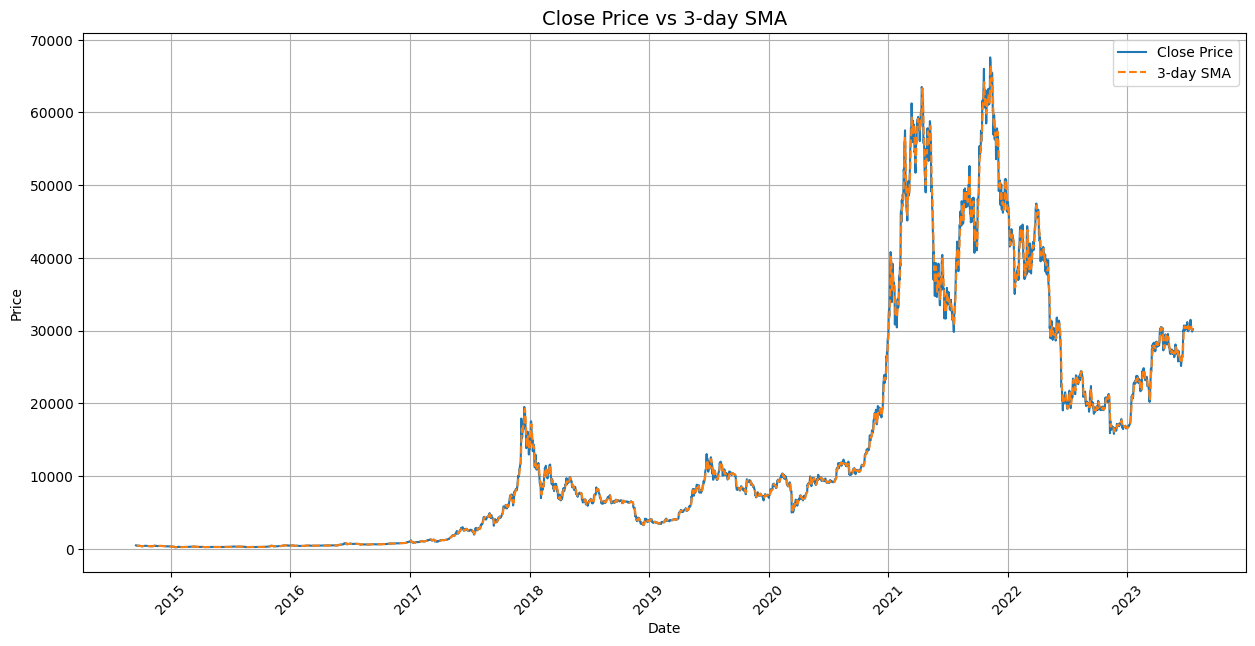

In [ ]:
# let's plot Close and 3_day_SMA in a single axes 
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=data,
             x=data.index,
             y=data['Close'],
             markers='o',
             label = "Close Price",
             ax=ax)

sns.lineplot(data=data,
             x=data.index,
             y=data['3_day SMA'],
             markers='s',
             linestyle = '--',
             label = '3-day SMA',
             ax=ax)

# Customize plot
ax.set_title("Close Price vs 3-day SMA", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [11]:
# let us zoom in and use data for the year 2023 
data.loc['2023']

,Open,High,Low,Close,Adj Close,Volume,3_day SMA
Date,,,,,,,
2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,16591.720703
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,16620.348958
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,16664.469401
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,16743.855469
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,16793.277344
...,...,...,...,...,...,...,...
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756,30701.974609
2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470,30293.002604
2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074,30230.276042


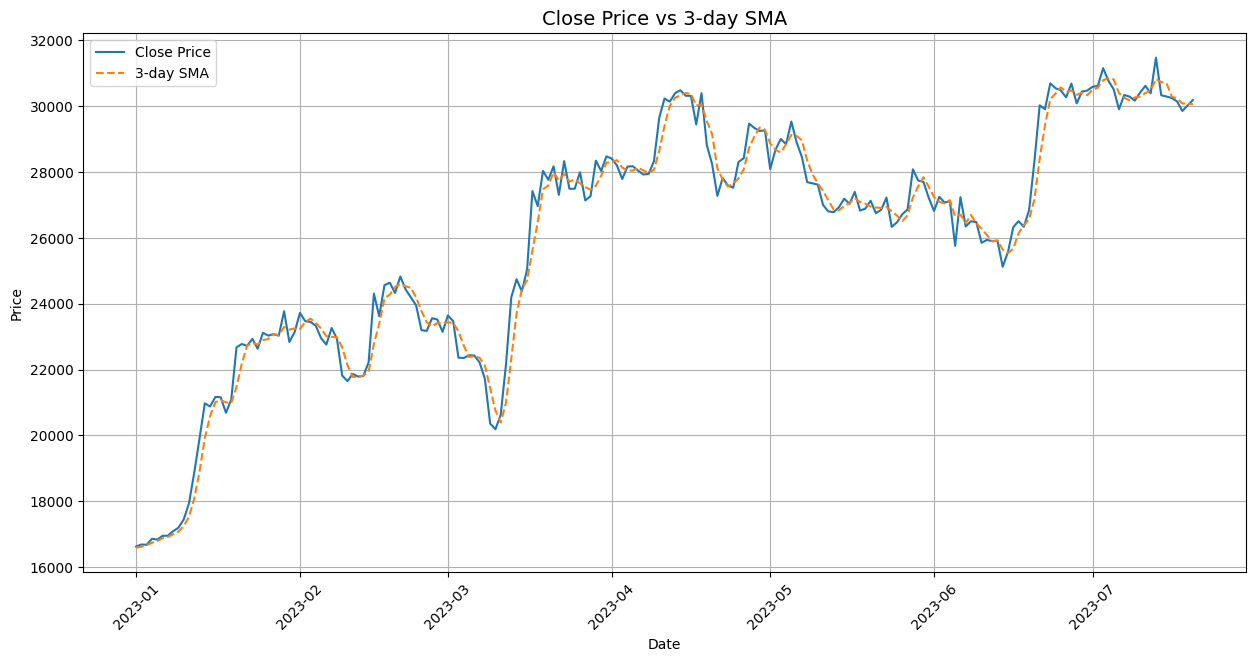

In [12]:
# let's plot this for the year 2023
fig, ax = plt.subplots(figsize=(15,7))

# the 2023 year data we want to plot
data_2023 = data.loc['2023']

sns.lineplot(data=data_2023,
             x=data_2023.index,
             y=data_2023['Close'],
             markers='o',
             label = "Close Price",
             ax=ax)

sns.lineplot(data=data_2023.loc['2023'],
             x=data_2023.index,
             y=data_2023['3_day SMA'],
             markers='s',
             linestyle = '--',
             label = '3-day SMA',
             ax=ax)

# Customize plot
ax.set_title("Close Price vs 3-day SMA", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

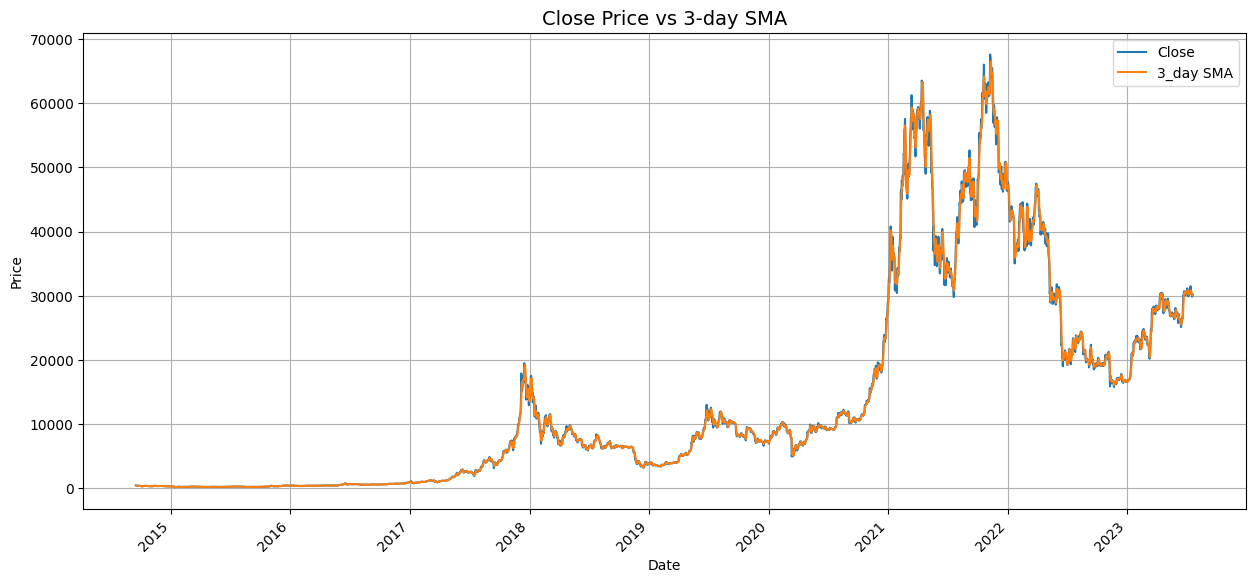

In [ ]:
# simpler way - fast way to plot 
data[['Close', '3_day SMA']].plot(figsize=(15,7))

# Customize plot
plt.title("Close Price vs 3-day SMA", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

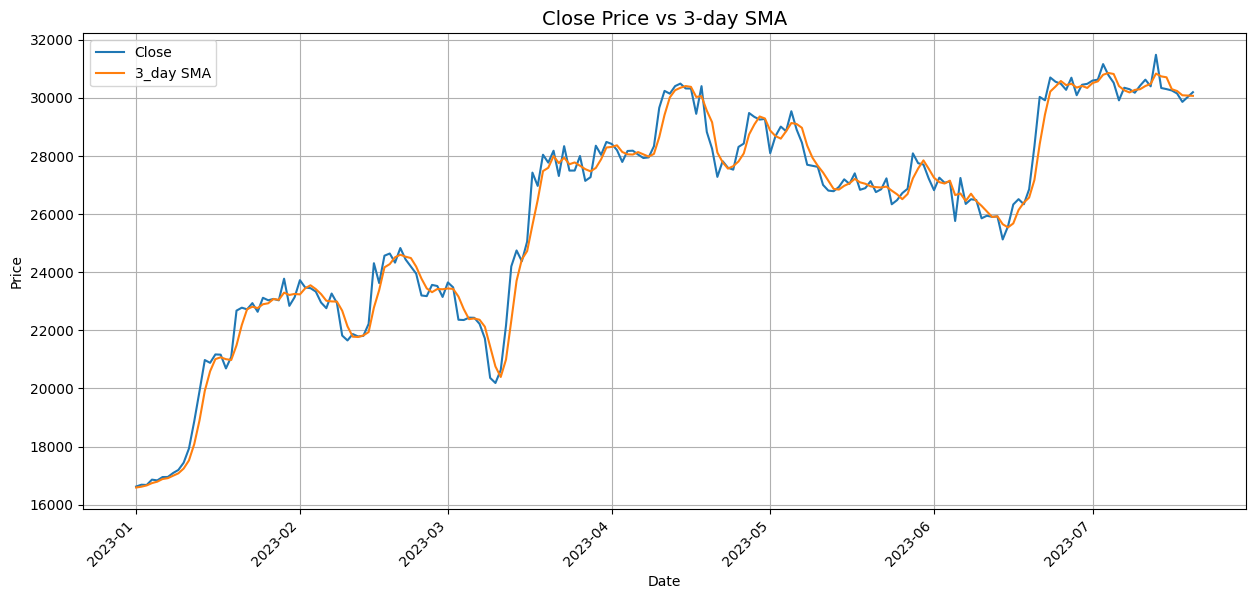

In [ ]:
# simpler way - fast way to plot 
data[['Close', '3_day SMA']].loc['2023'].plot(figsize=(15,7))

# Customize plot
plt.title("Close Price vs 3-day SMA", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

Let us now try to find the **month with the highest closing average**!

In [ ]:
# find the mean closing price for each month
data.resample('ME').agg({
    'Close':'mean'
})

,Close
Date,
2014-09-30,407.182428
2014-10-31,364.148873
2014-11-30,366.099799
2014-12-31,341.267871
2015-01-31,248.782547
...,...
2023-03-31,25116.900895
2023-04-30,28857.574544
2023-05-31,27499.307145


In [ ]:
# let us now find the highest mean closing price from all the months
data.resample('ME').agg({
    'Close':'mean'
}).max()

Close    60621.488802
dtype: float64

In [19]:
# let us now find the month which has the highest closing average - use idmax()
data.resample('ME').agg({
    'Close':'mean'
}).idxmax()

Close   2021-11-30
dtype: datetime64[ns]

Let us now calculate the **percentage change in the closing price**.

In [ ]:
# calculating the percent change in closing price 
data['daily_returns_100%'] = data['Close'].pct_change()*100
data['daily_returns_100%']

Date
2014-09-17         NaN
2014-09-18   -7.192558
2014-09-19   -6.984264
2014-09-20    3.573492
2014-09-21   -2.465855
                ...   
2023-07-15   -0.126134
2023-07-16   -0.154060
2023-07-17   -0.341313
2023-07-18   -0.959753
2023-07-20    1.116471
Name: daily_returns_100%, Length: 3228, dtype: float64

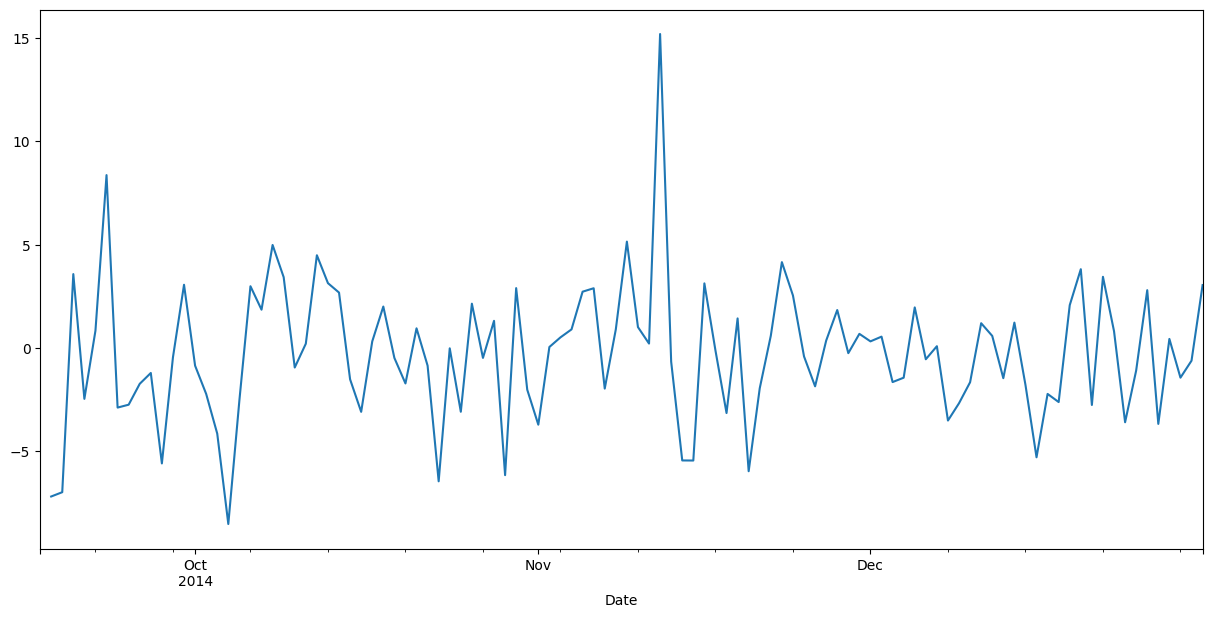

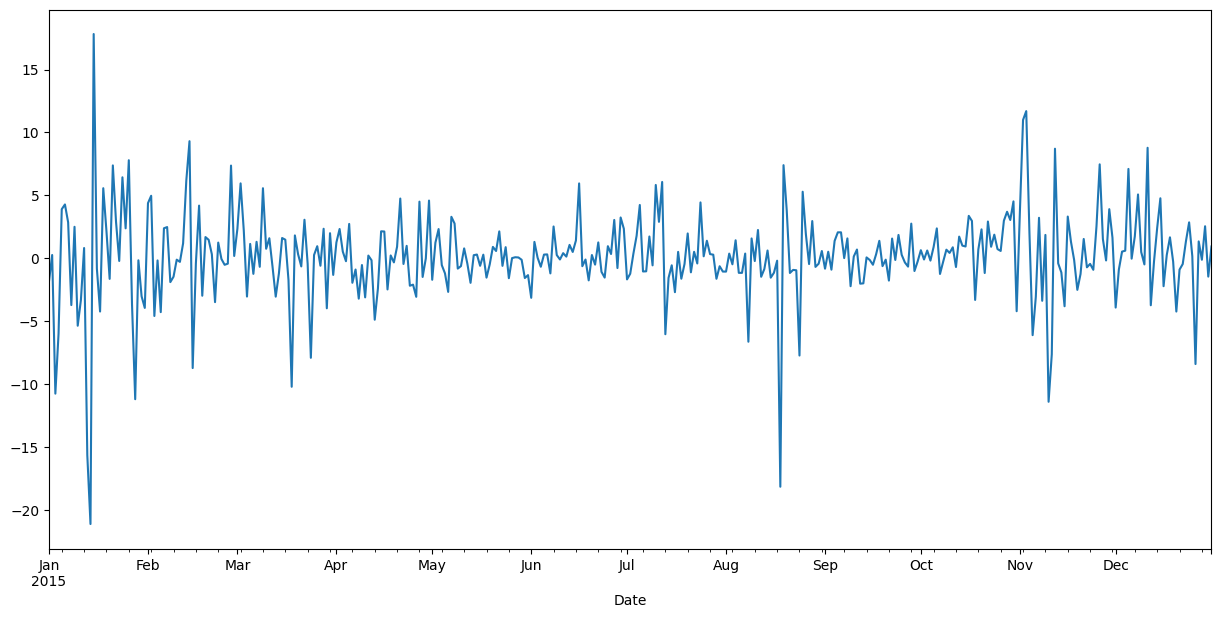

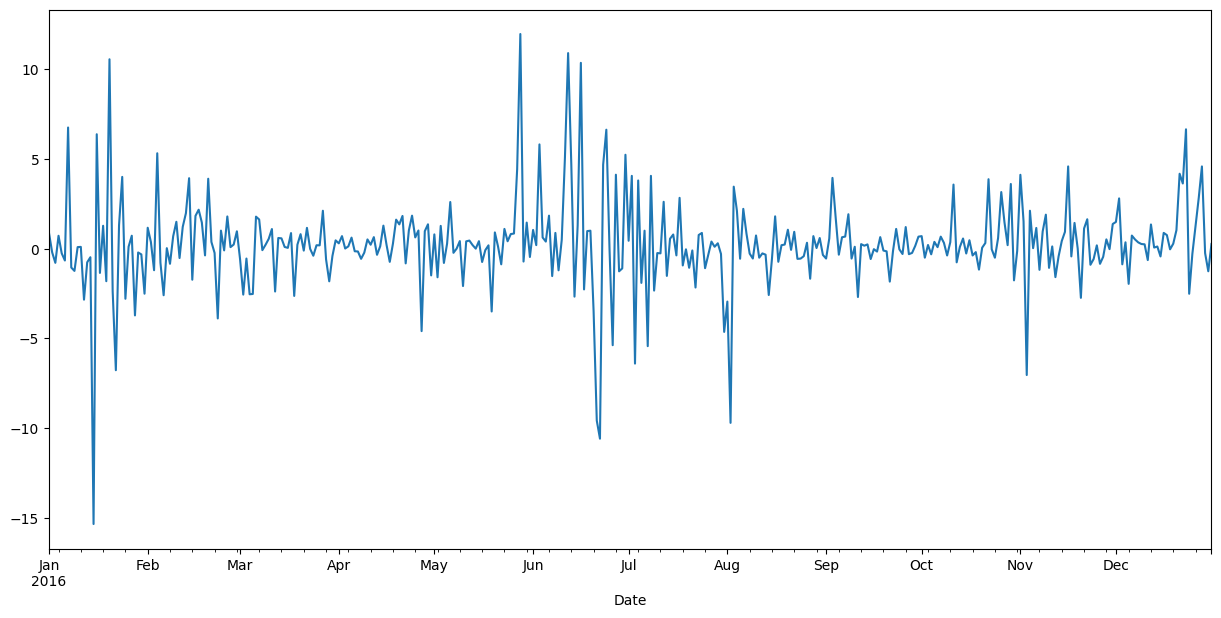

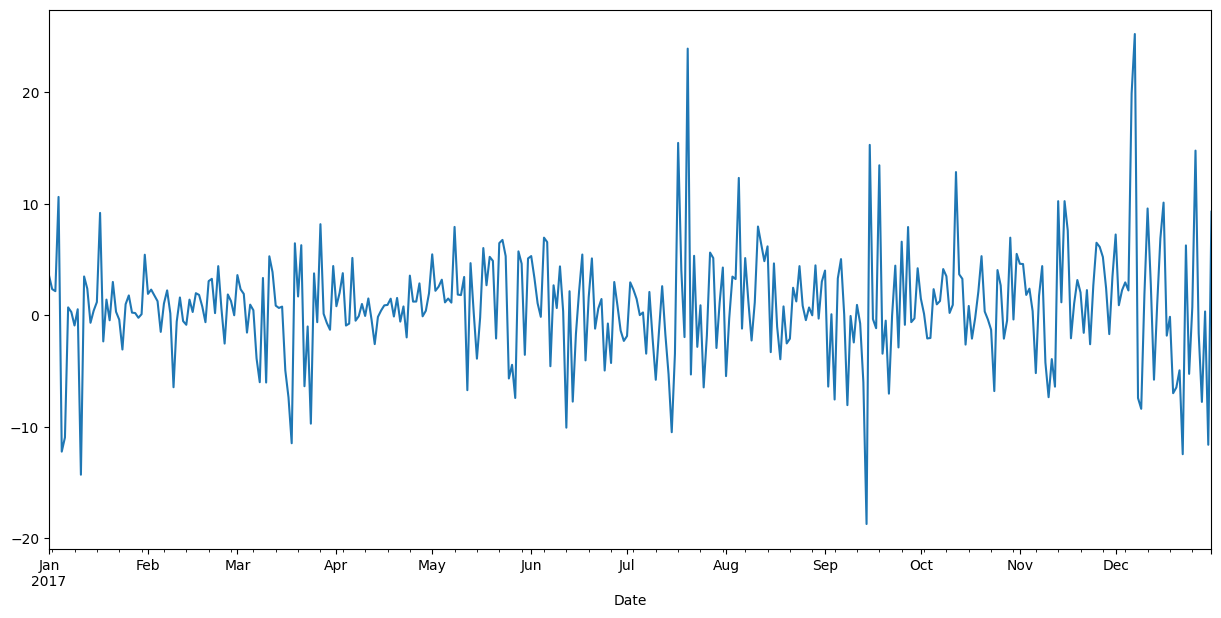

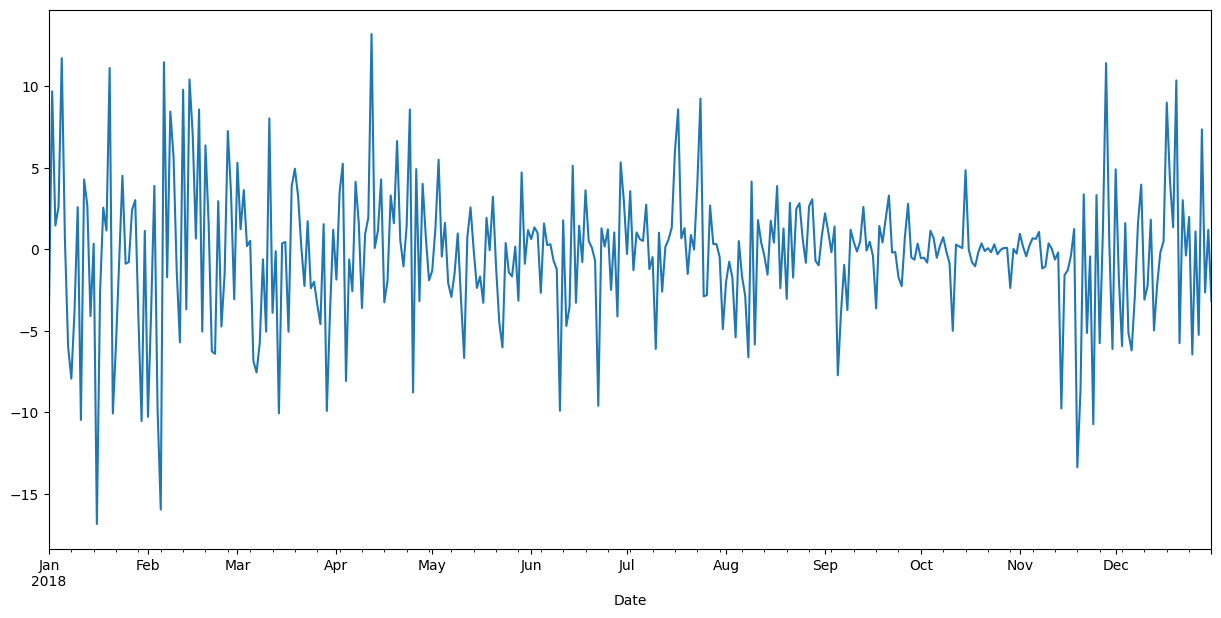

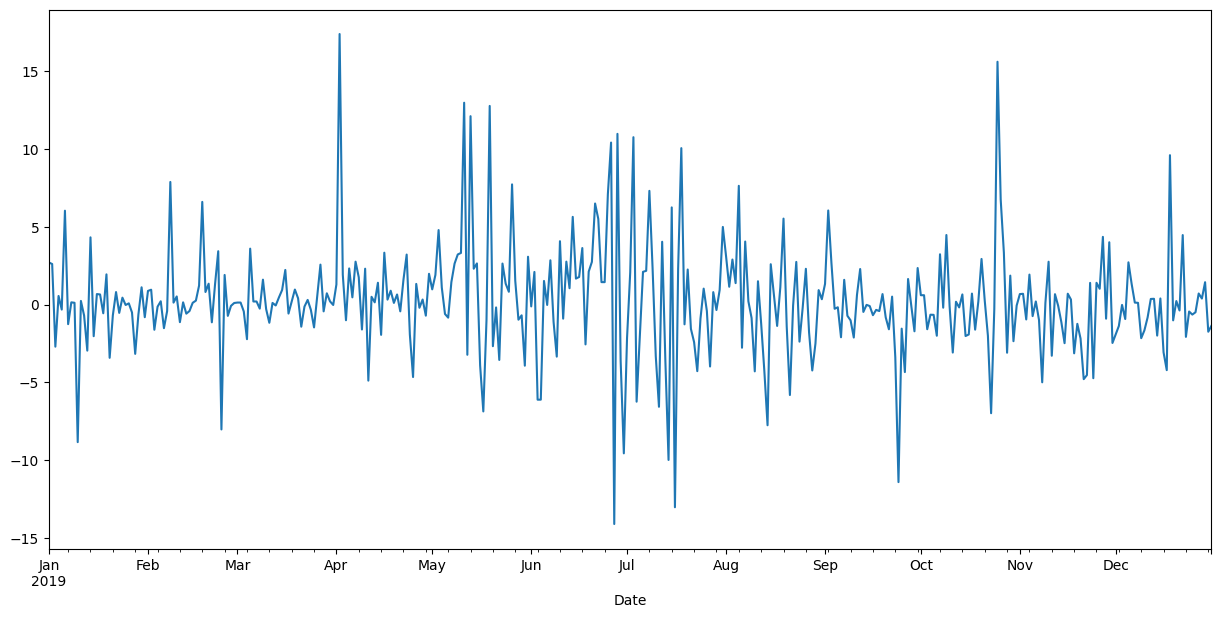

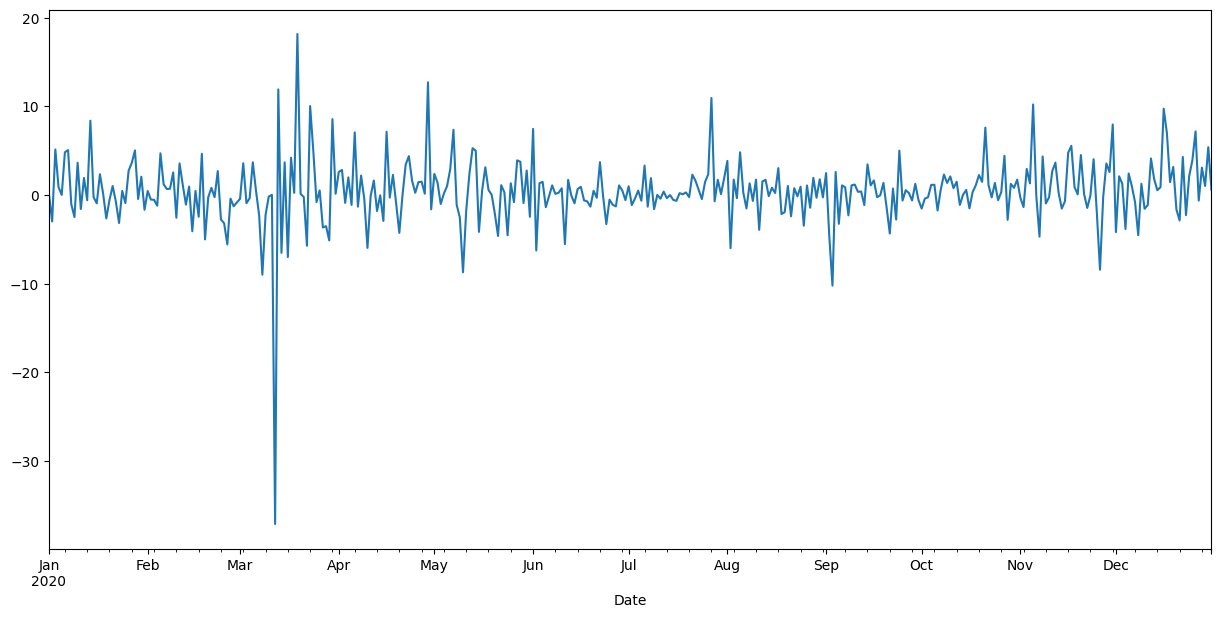

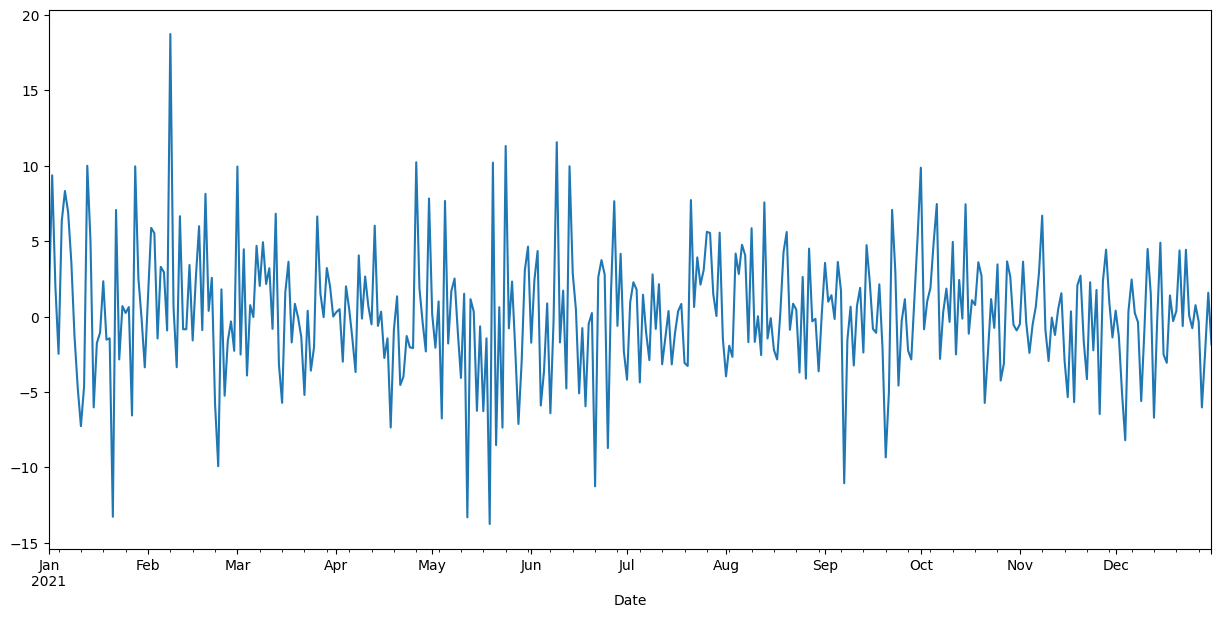

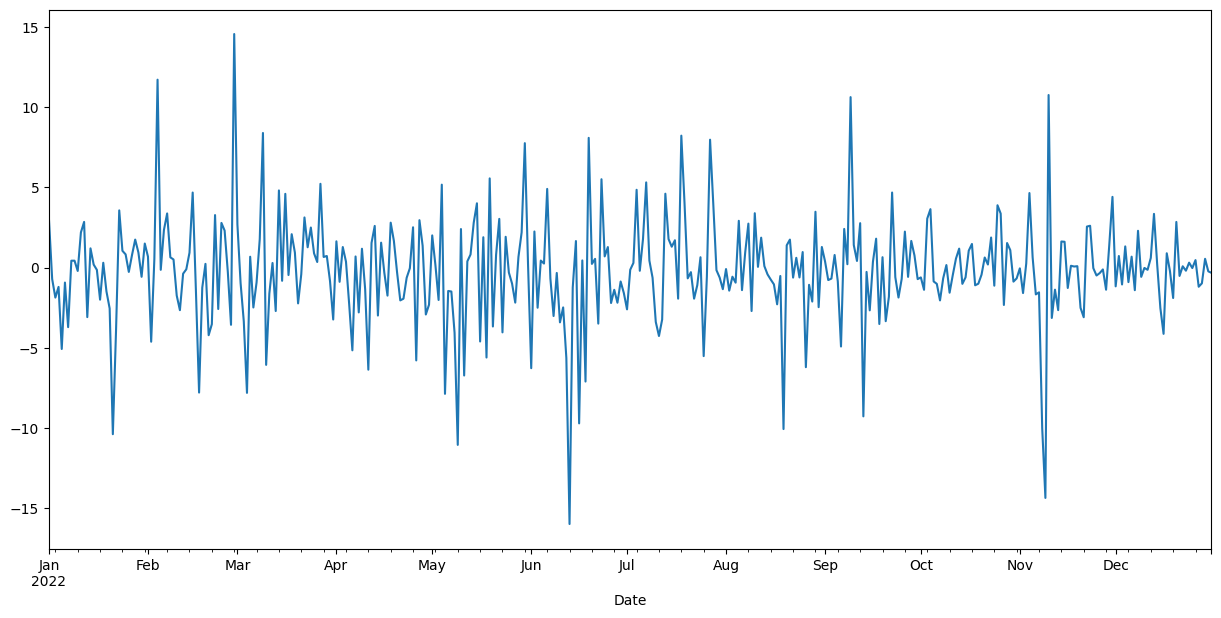

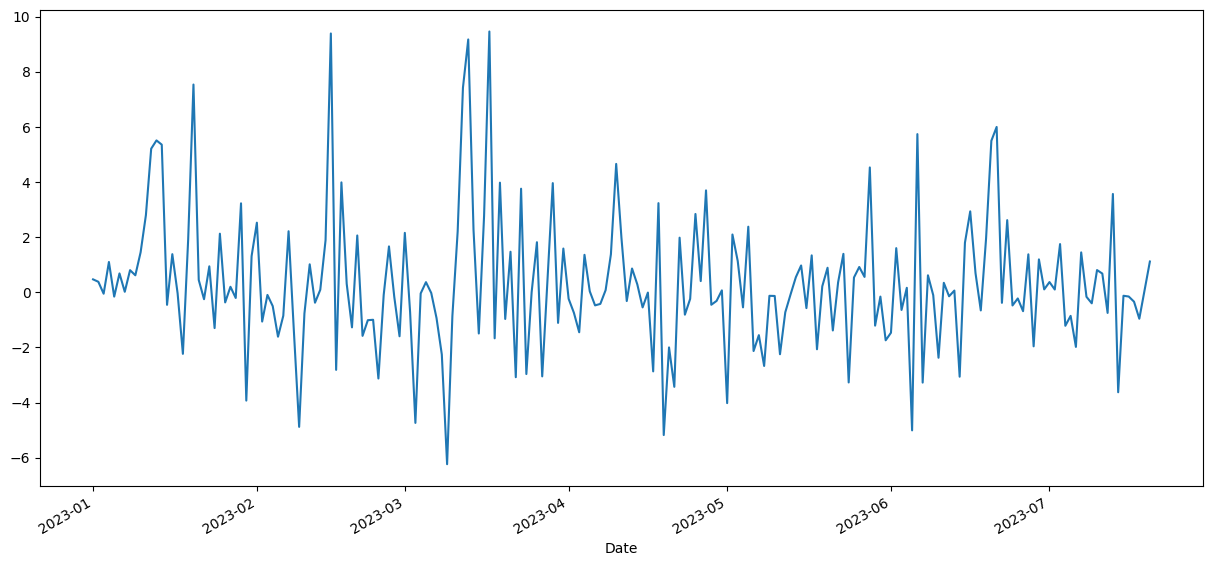

In [26]:
# plot it for each year
years = data.index.year.unique()

for year in years: 
    data['daily_returns_100%'].loc[str(year)].plot(figsize=(15,7))
    plt.show()

In [30]:
# check dates which has more than say 10% change in closing prices over the last date 
data[['Close','daily_returns_100%']][abs(data['daily_returns_100%'])>10]

,Close,daily_returns_100%
Date,,
2014-11-12,423.561005,15.193570
2015-01-03,281.082001,-10.776686
2015-01-13,225.860992,-15.659308
2015-01-14,178.102997,-21.144862
2015-01-15,209.843994,17.821709
...,...,...
2022-08-19,20877.552734,-10.059931
2022-09-09,21381.152344,10.612188
2022-11-08,18541.271484,-10.006132


### Data Visualization

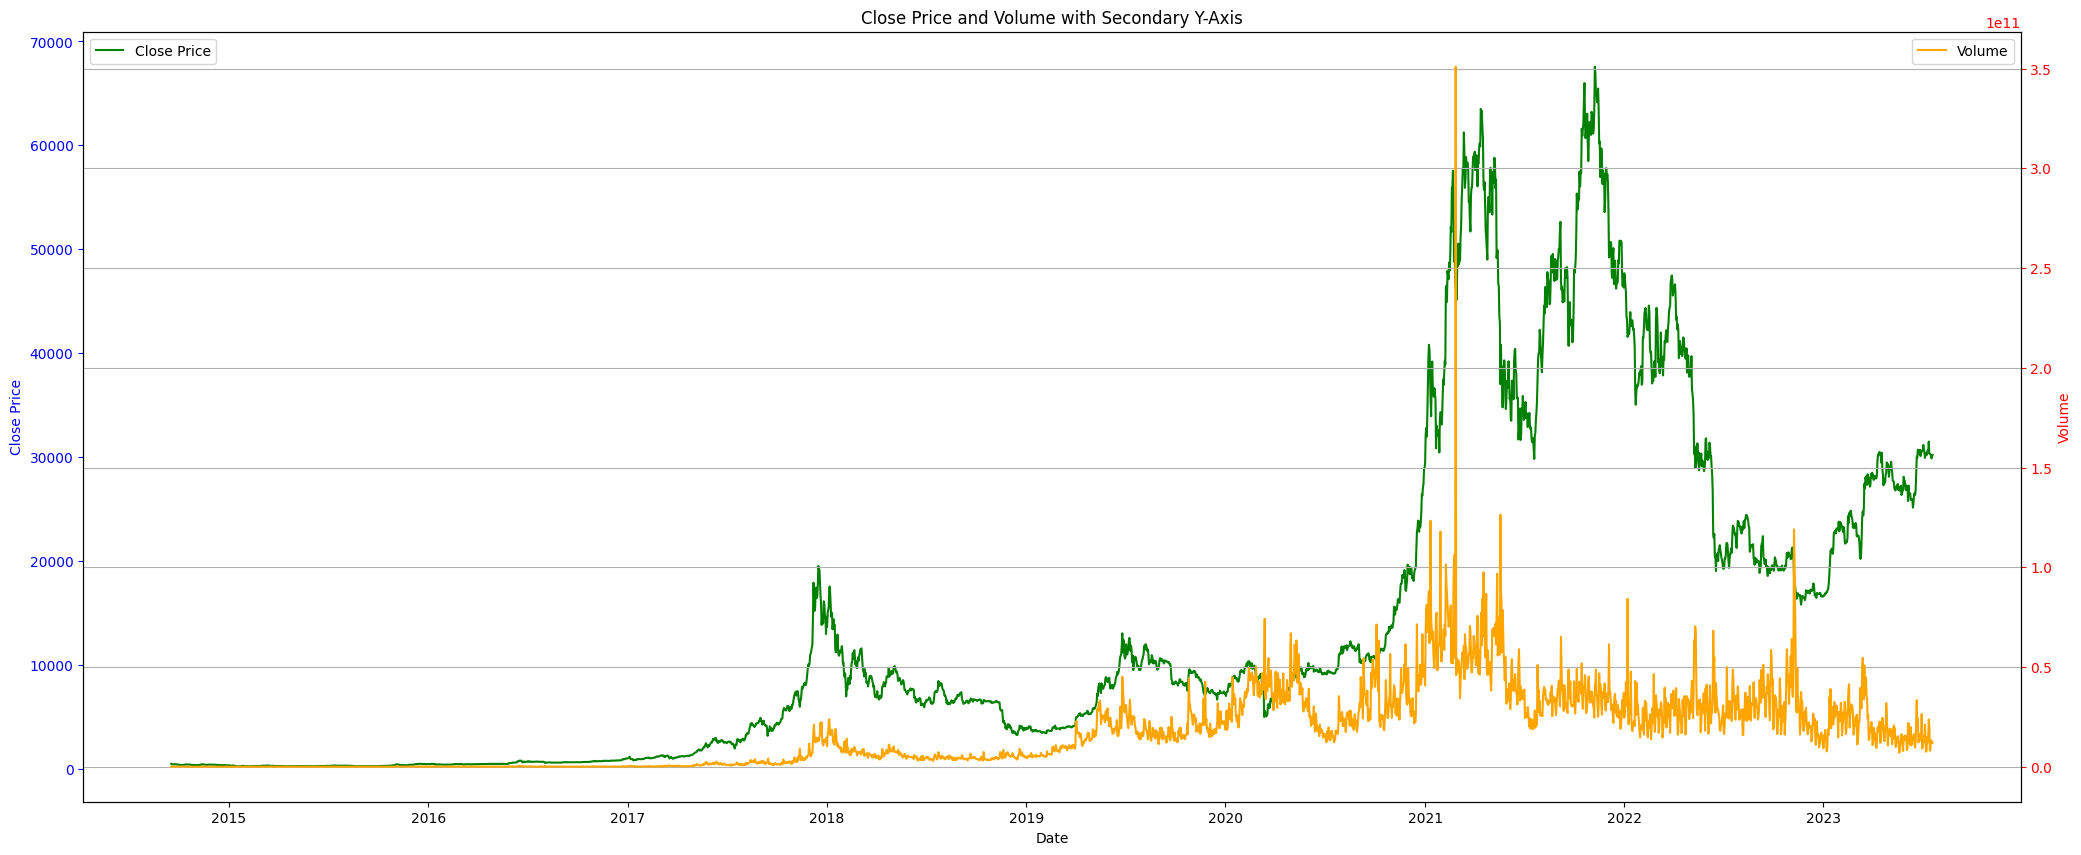

In [ ]:
# plot close and volume in a single chart

fig, ax1 = plt.subplots(figsize=(25,10))

# Plot Close Price on primary y-axis
sns.lineplot(data=data, x=data.index, y="Close", ax=ax1, label="Close Price", color="green")

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot Volume on secondary y-axis
sns.lineplot(data=data, x=data.index, y="Volume", ax=ax2, label="Volume", color="orange")

# Customize primary y-axis (Close Price)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis='y', colors="blue")
ax1.set_title("Close Price and Volume with Secondary Y-Axis")

# Customize secondary y-axis (Volume)
ax2.set_ylabel("Volume", color="red")
ax2.tick_params(axis='y', colors="red")

# Add Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

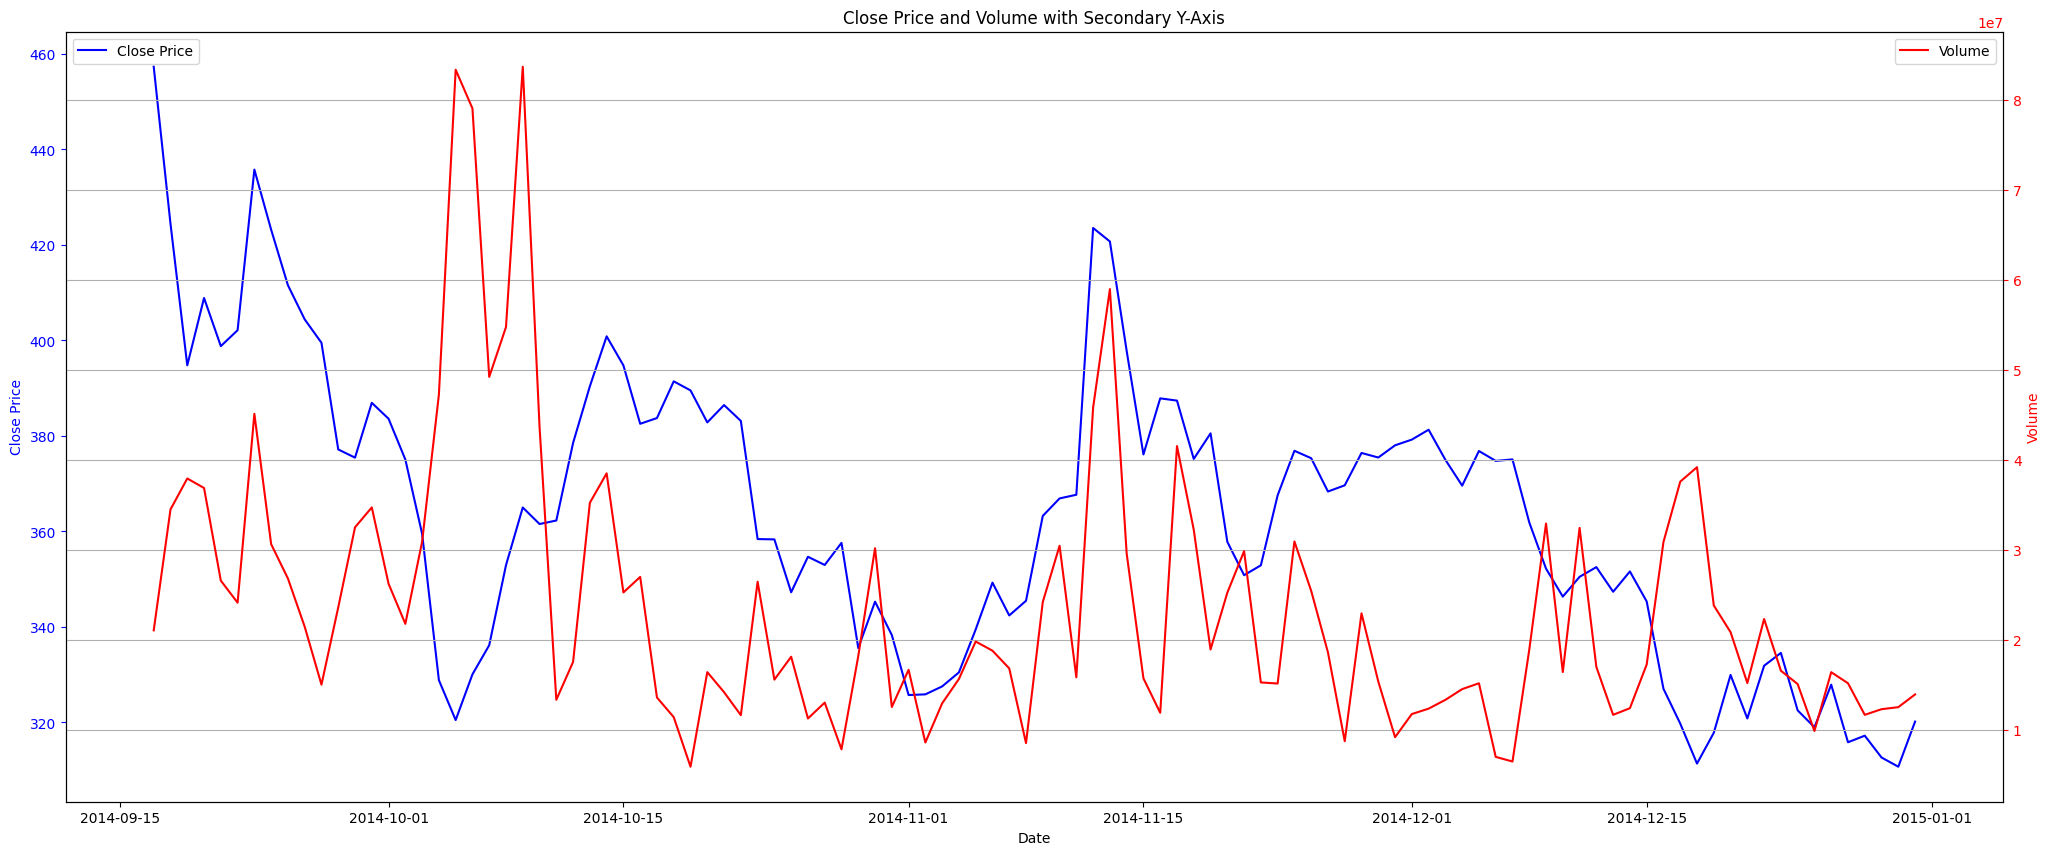

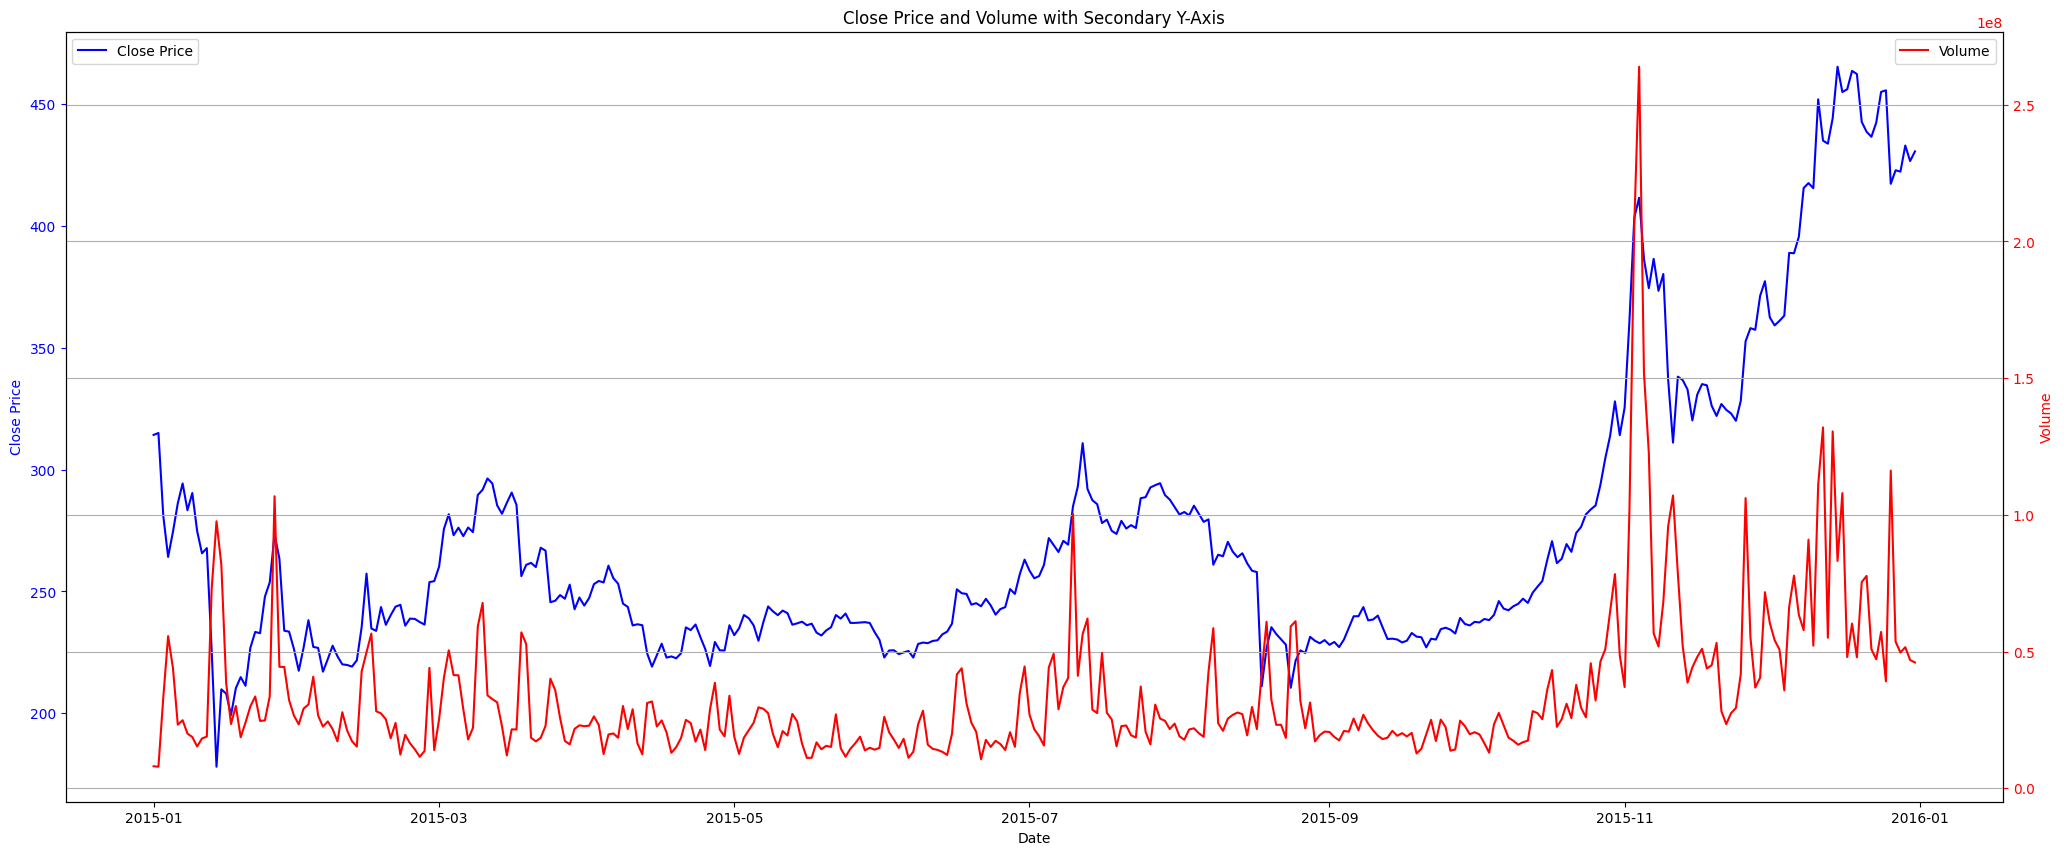

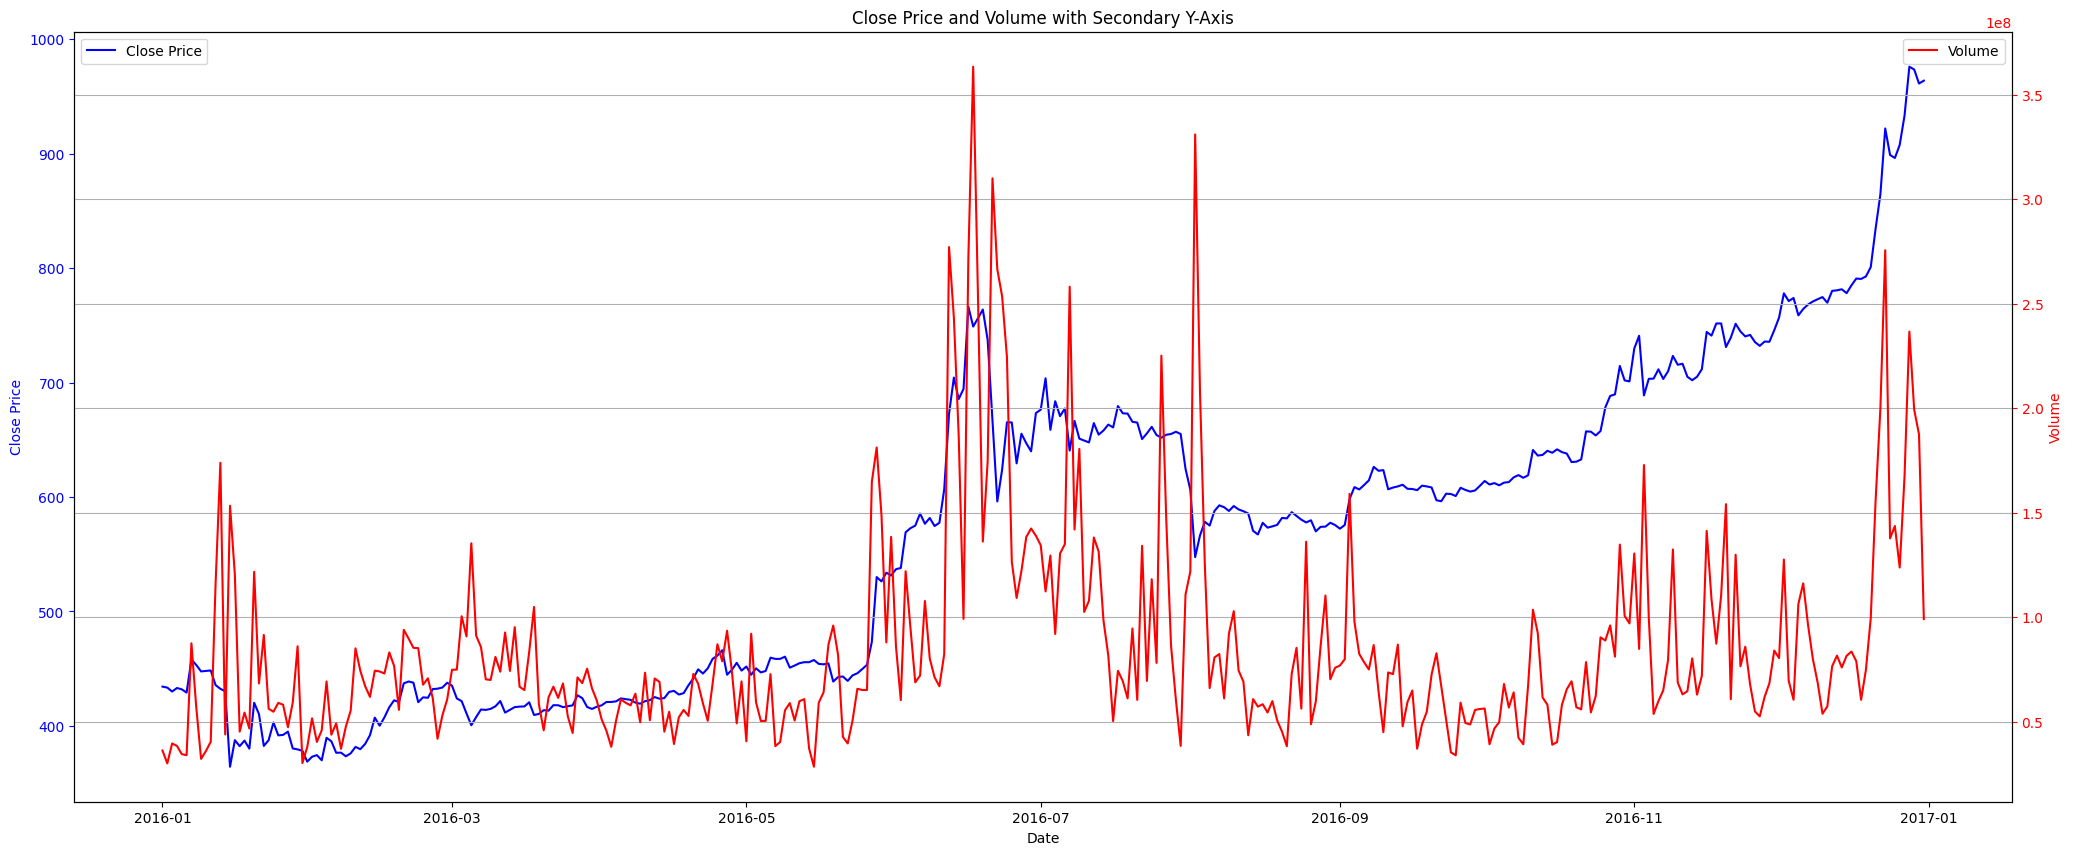

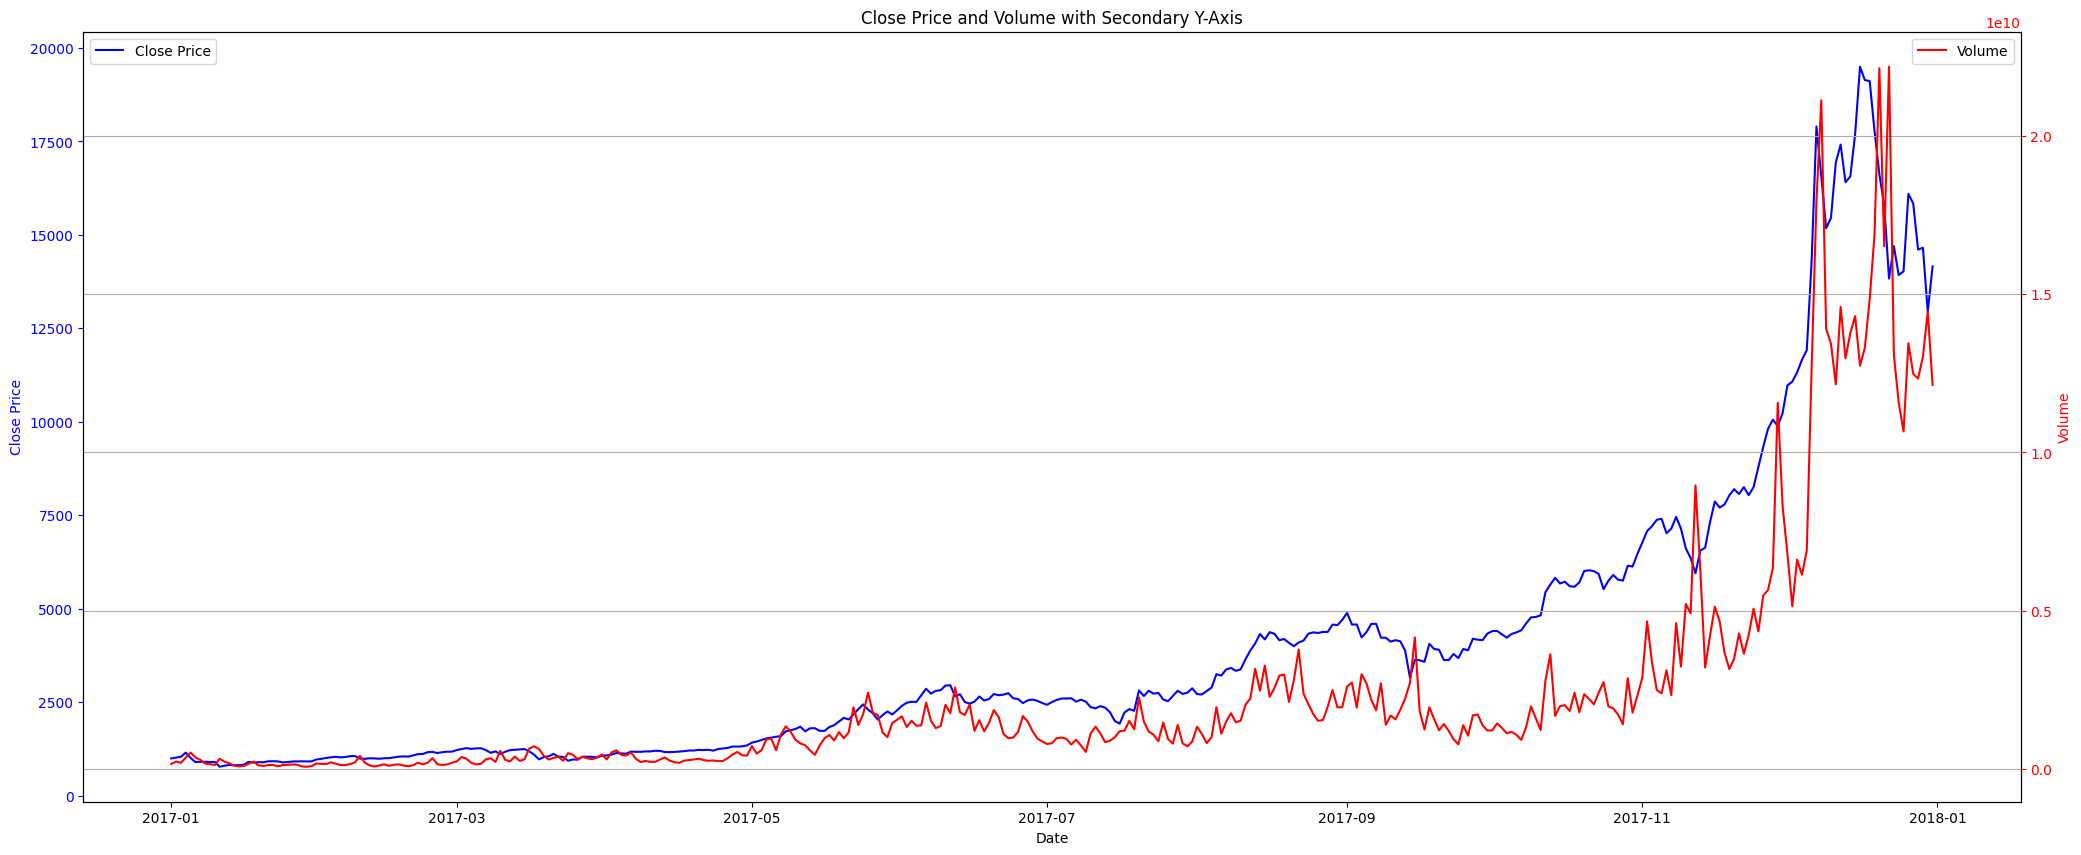

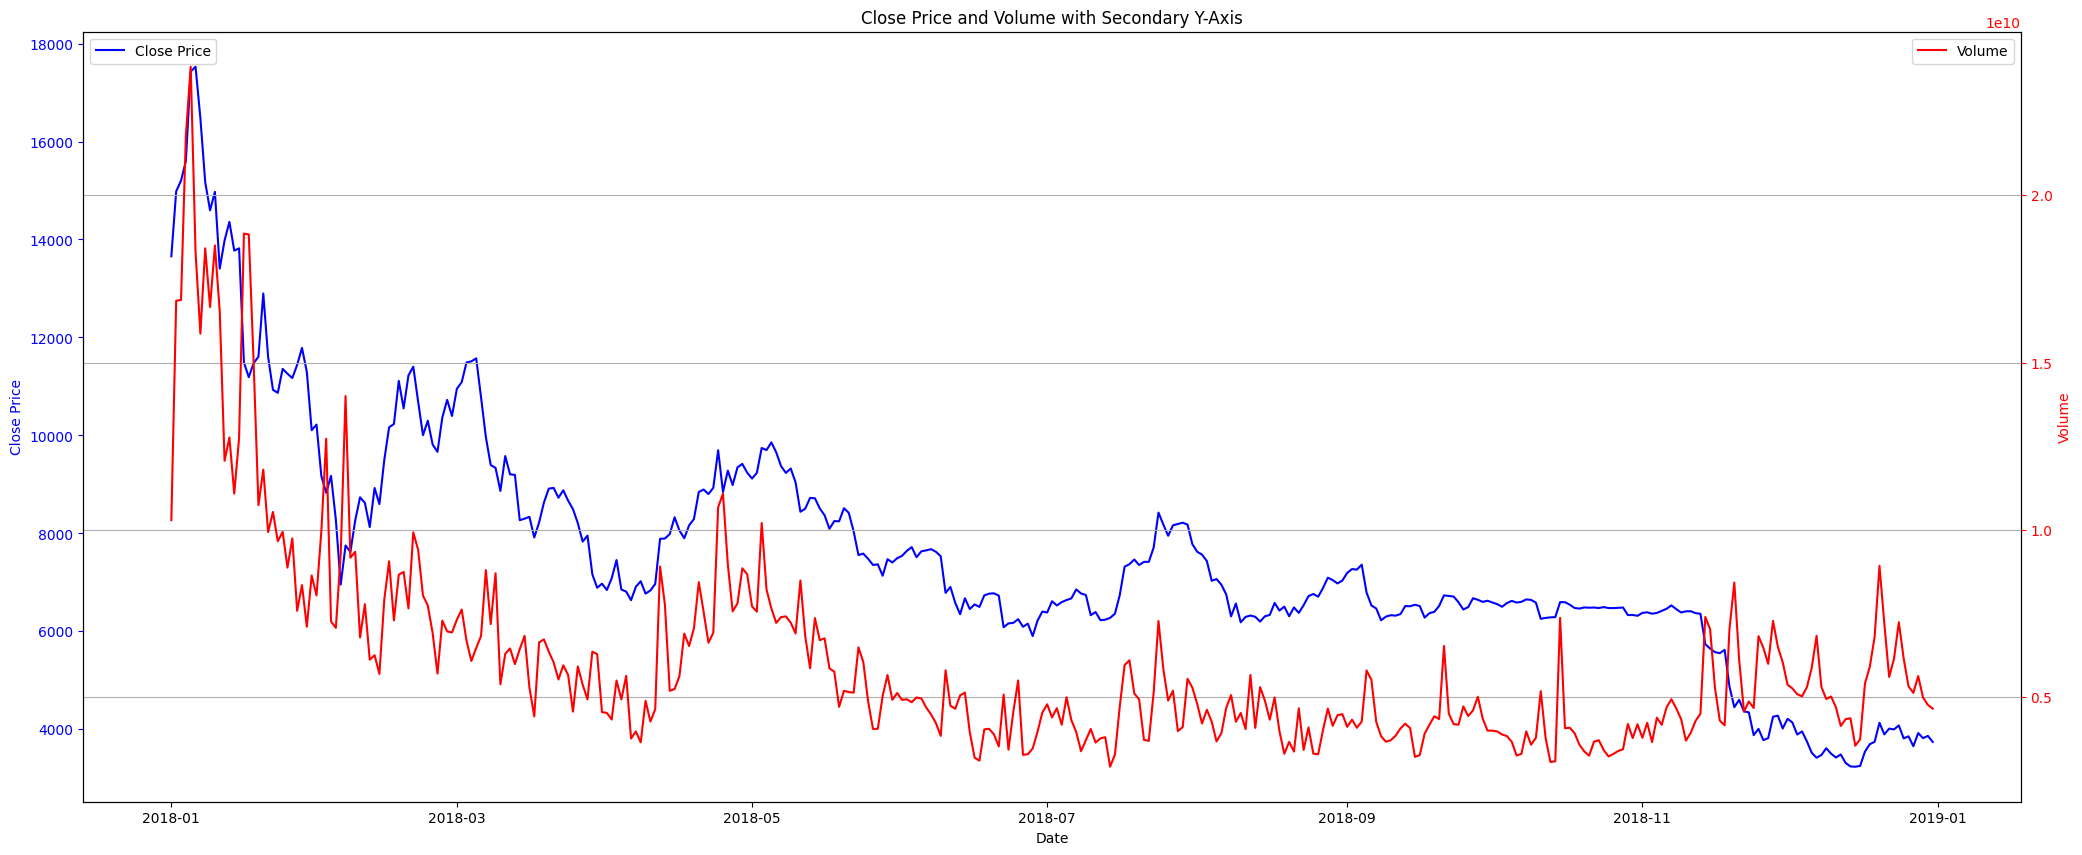

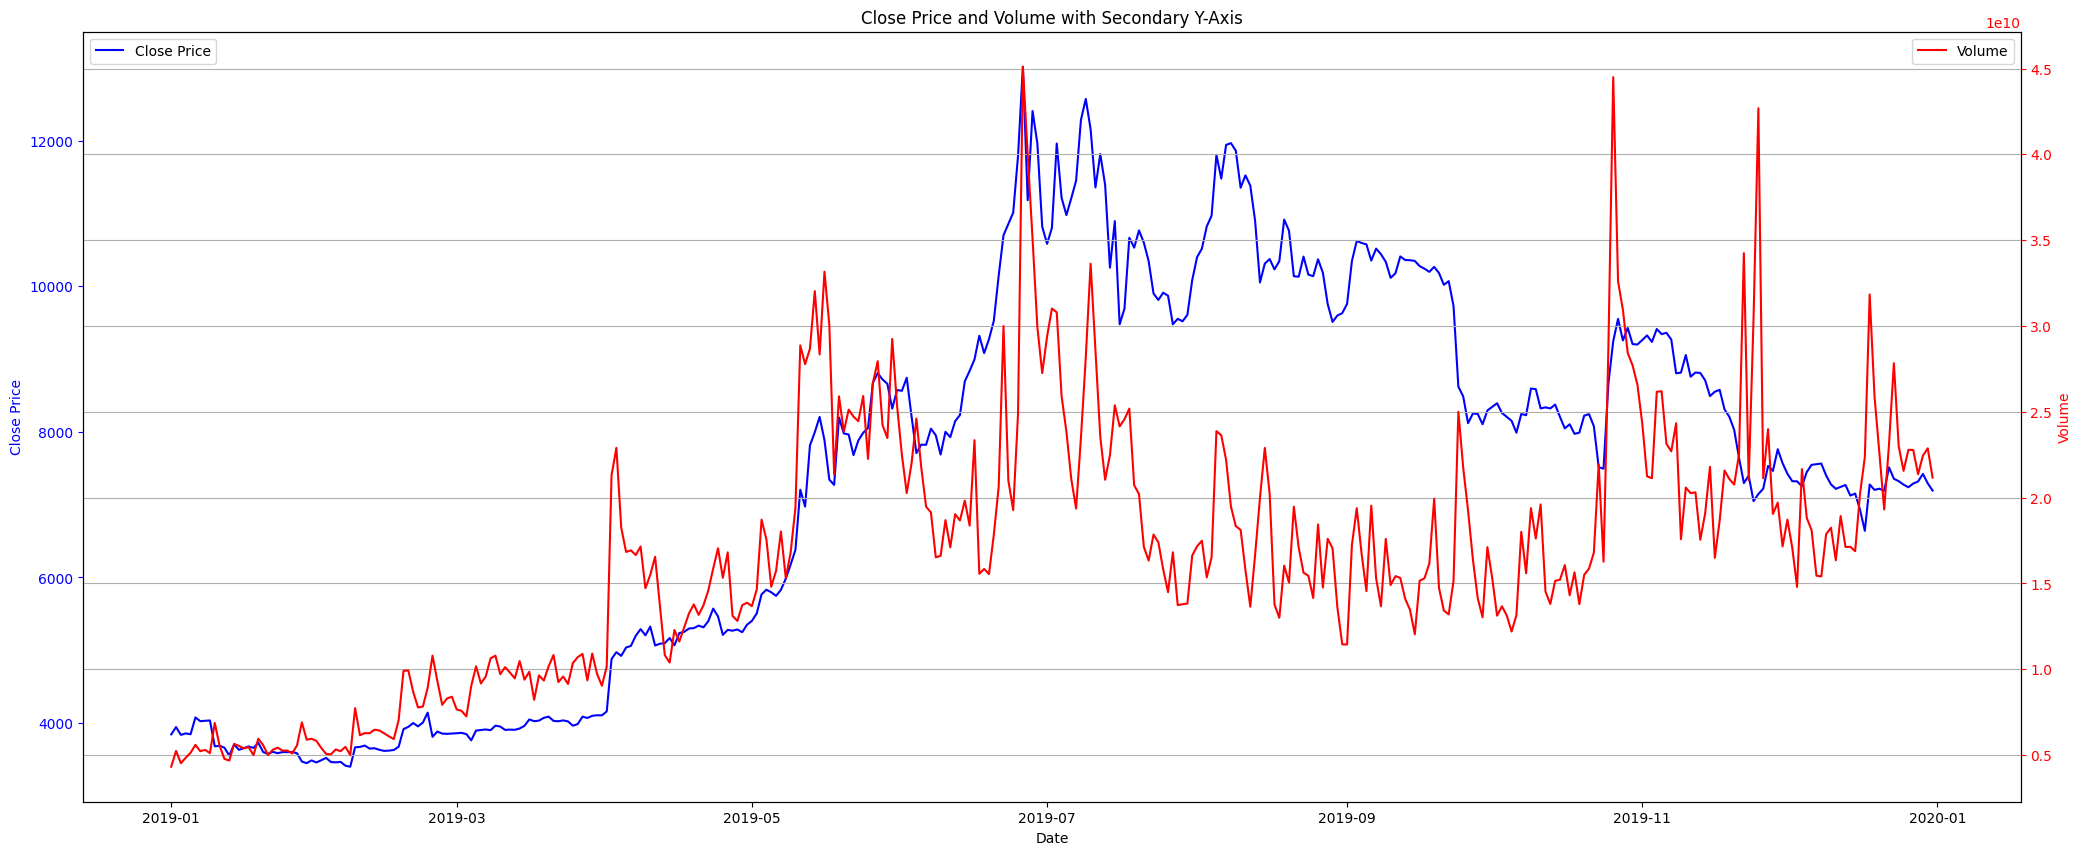

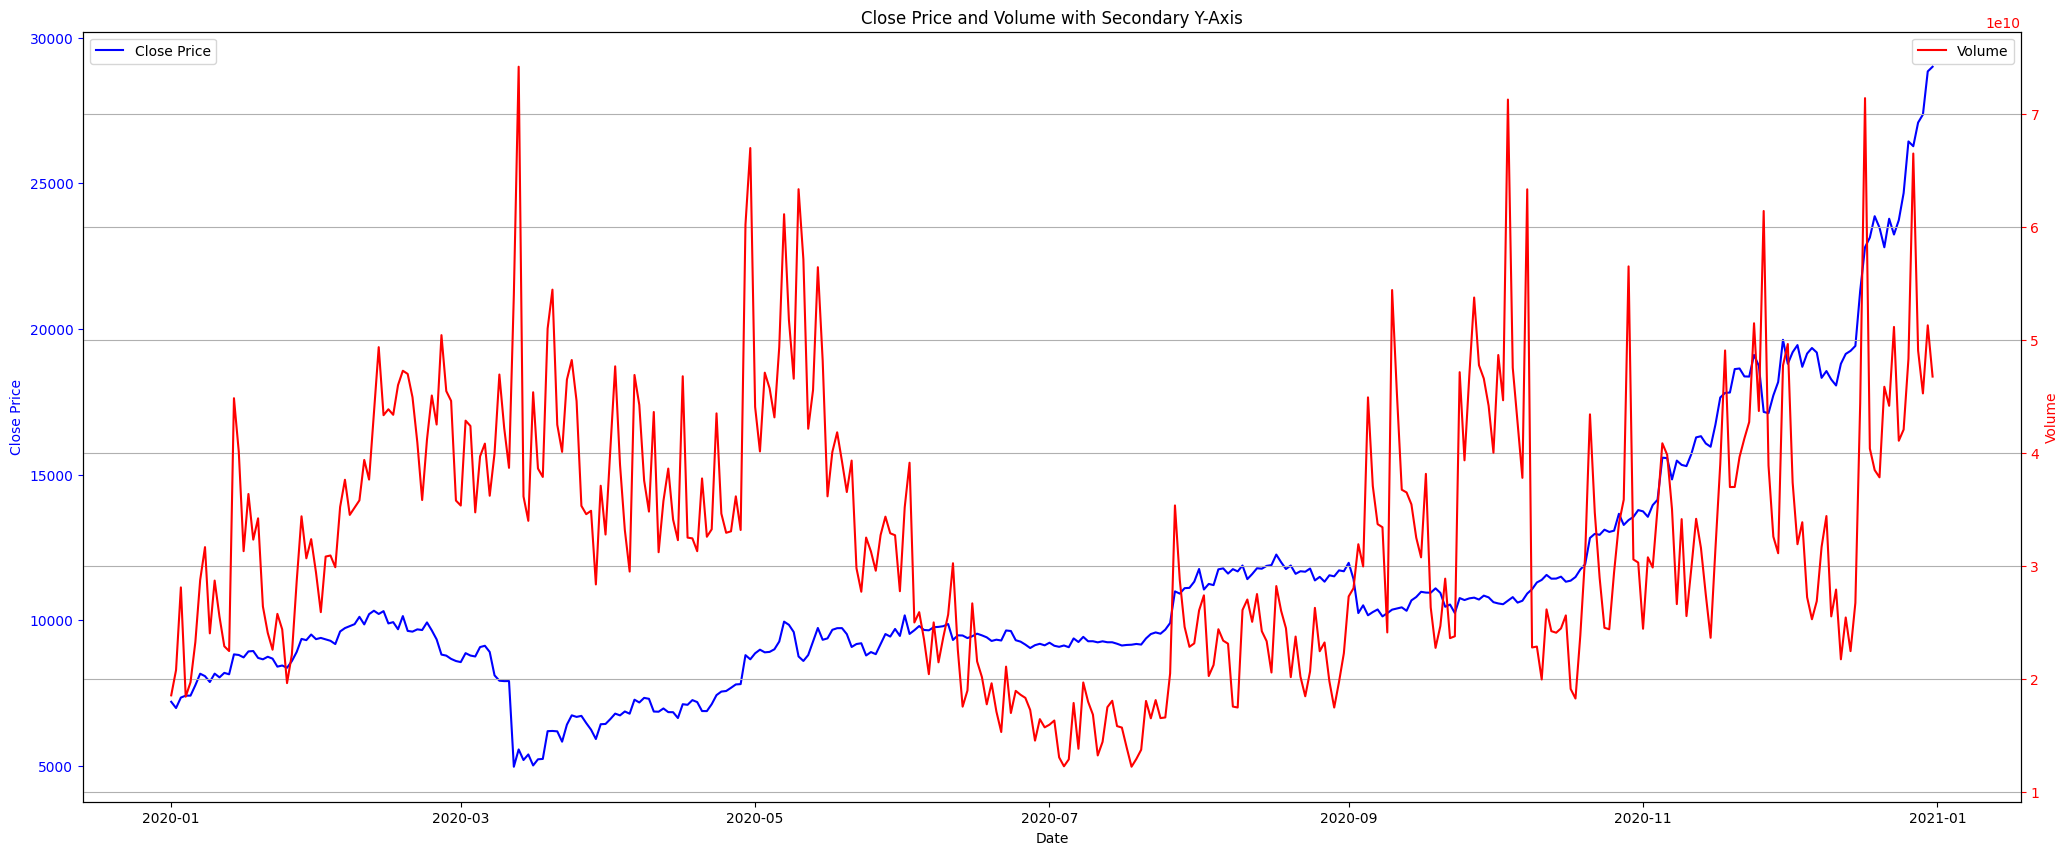

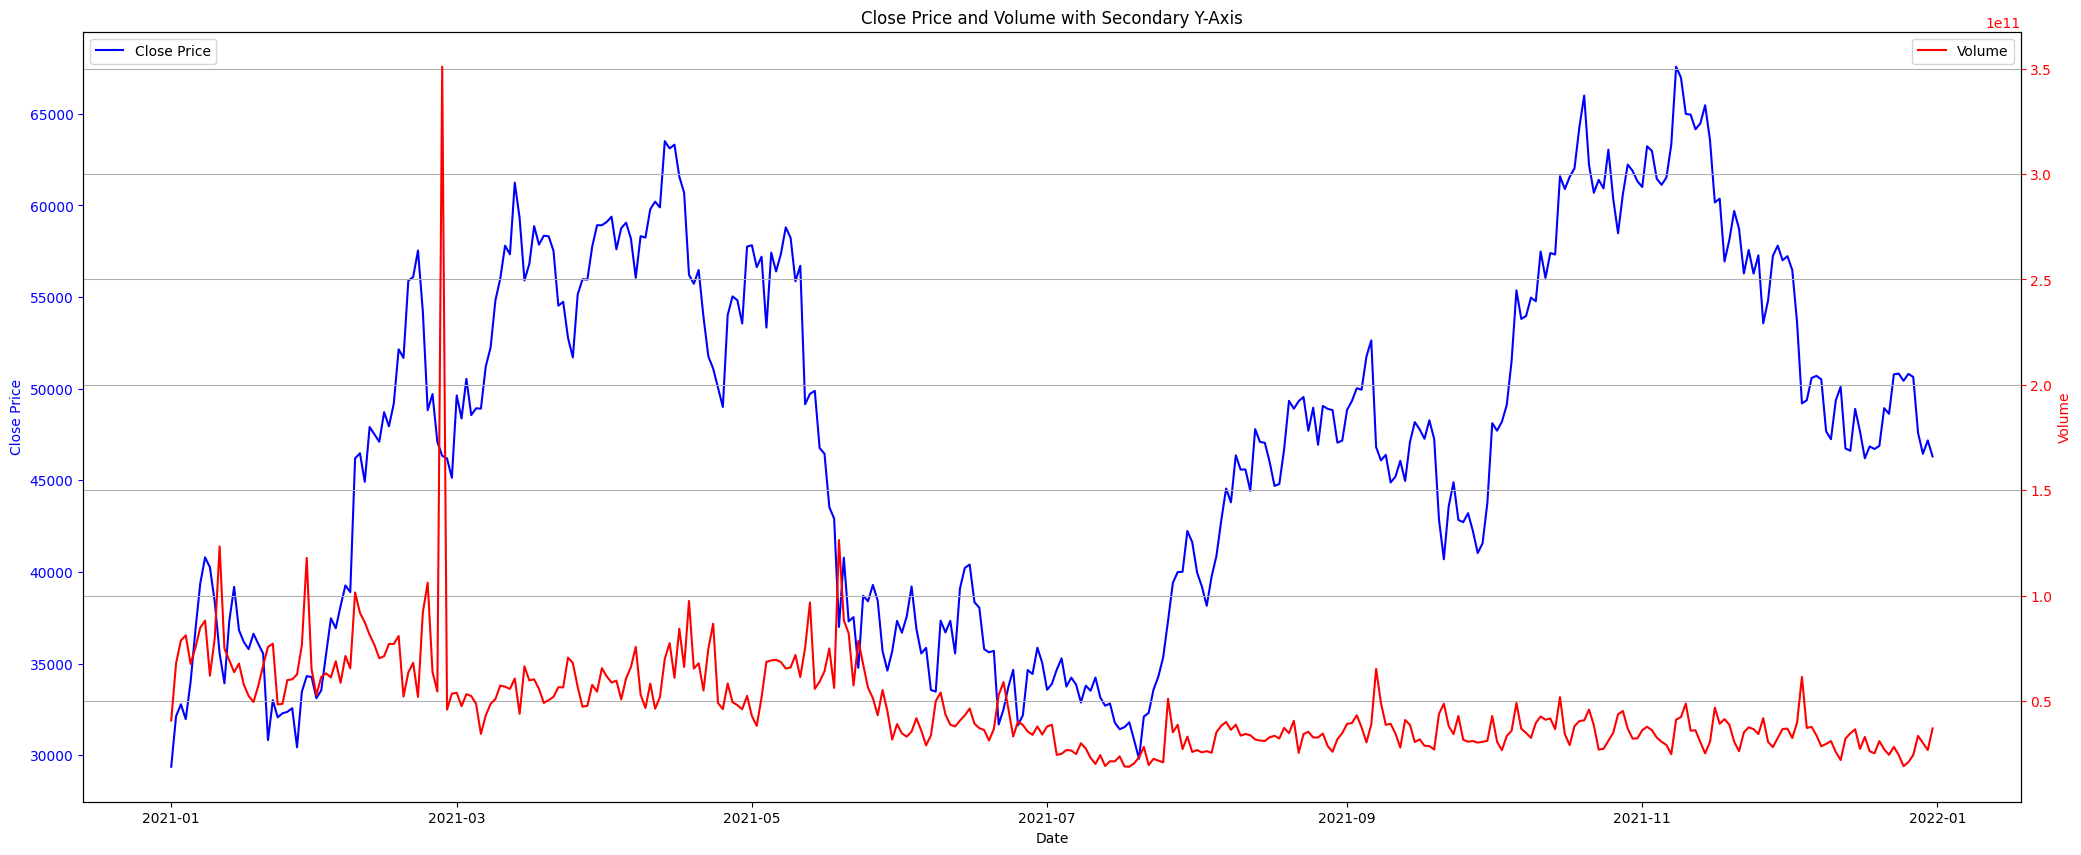

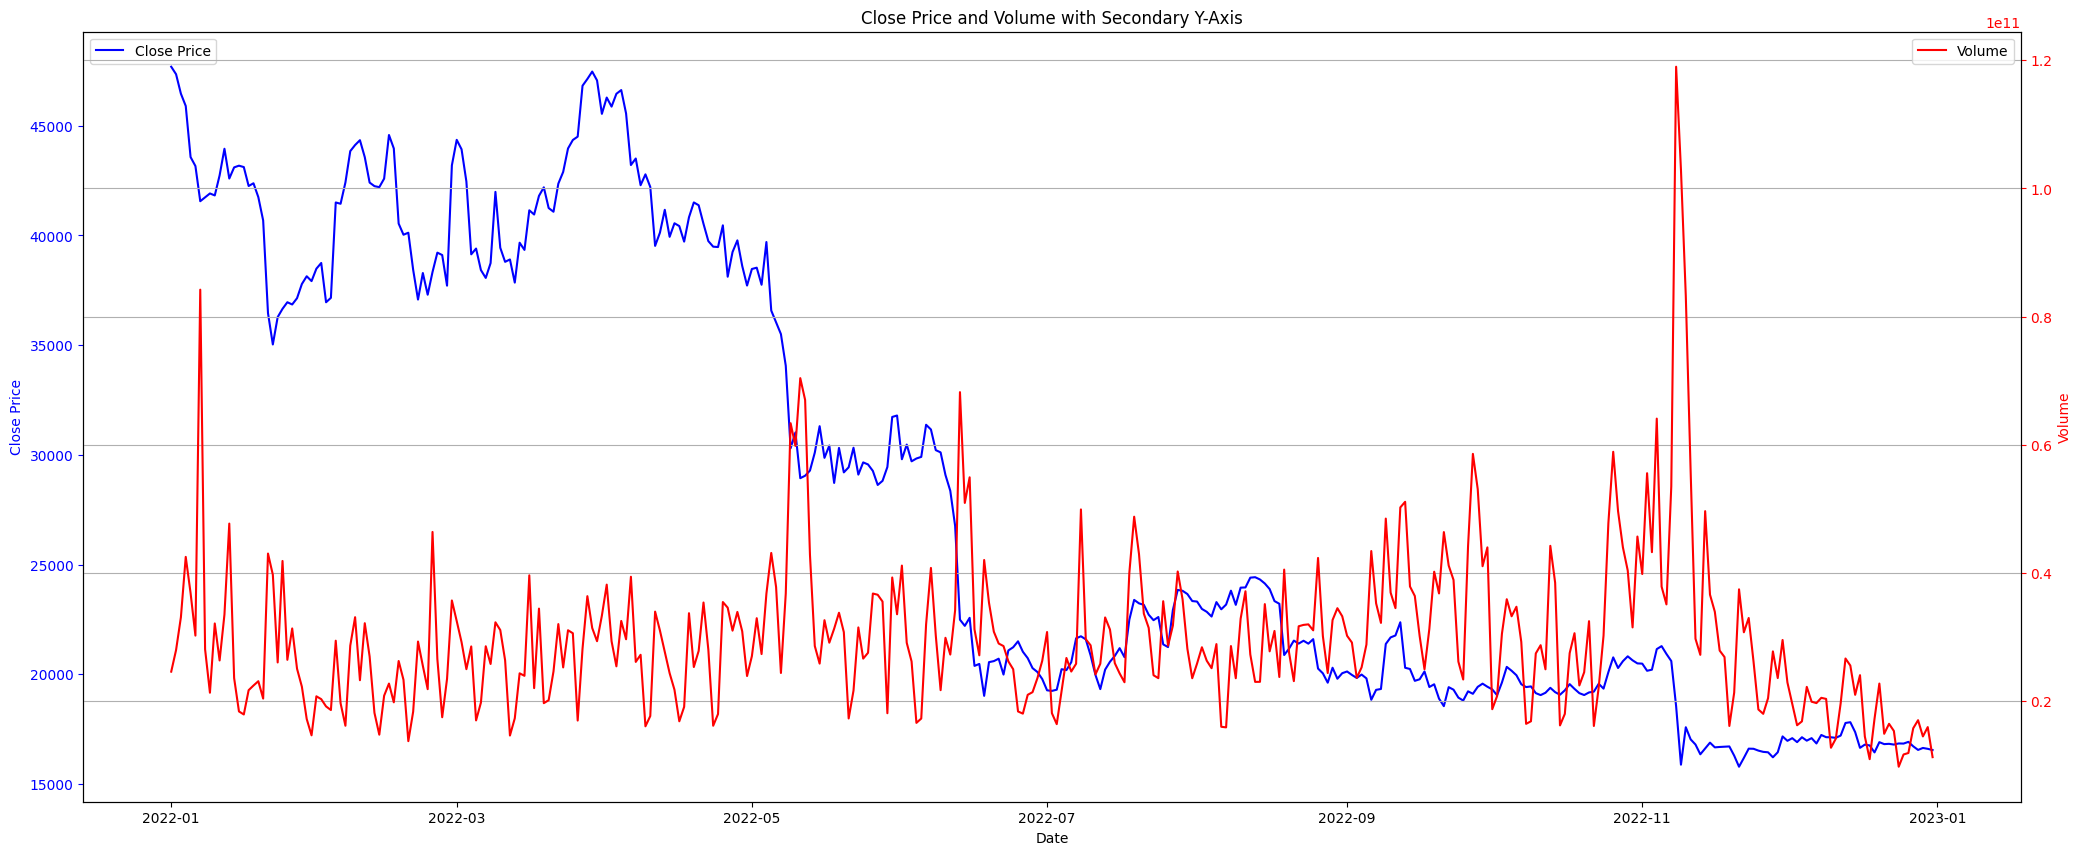

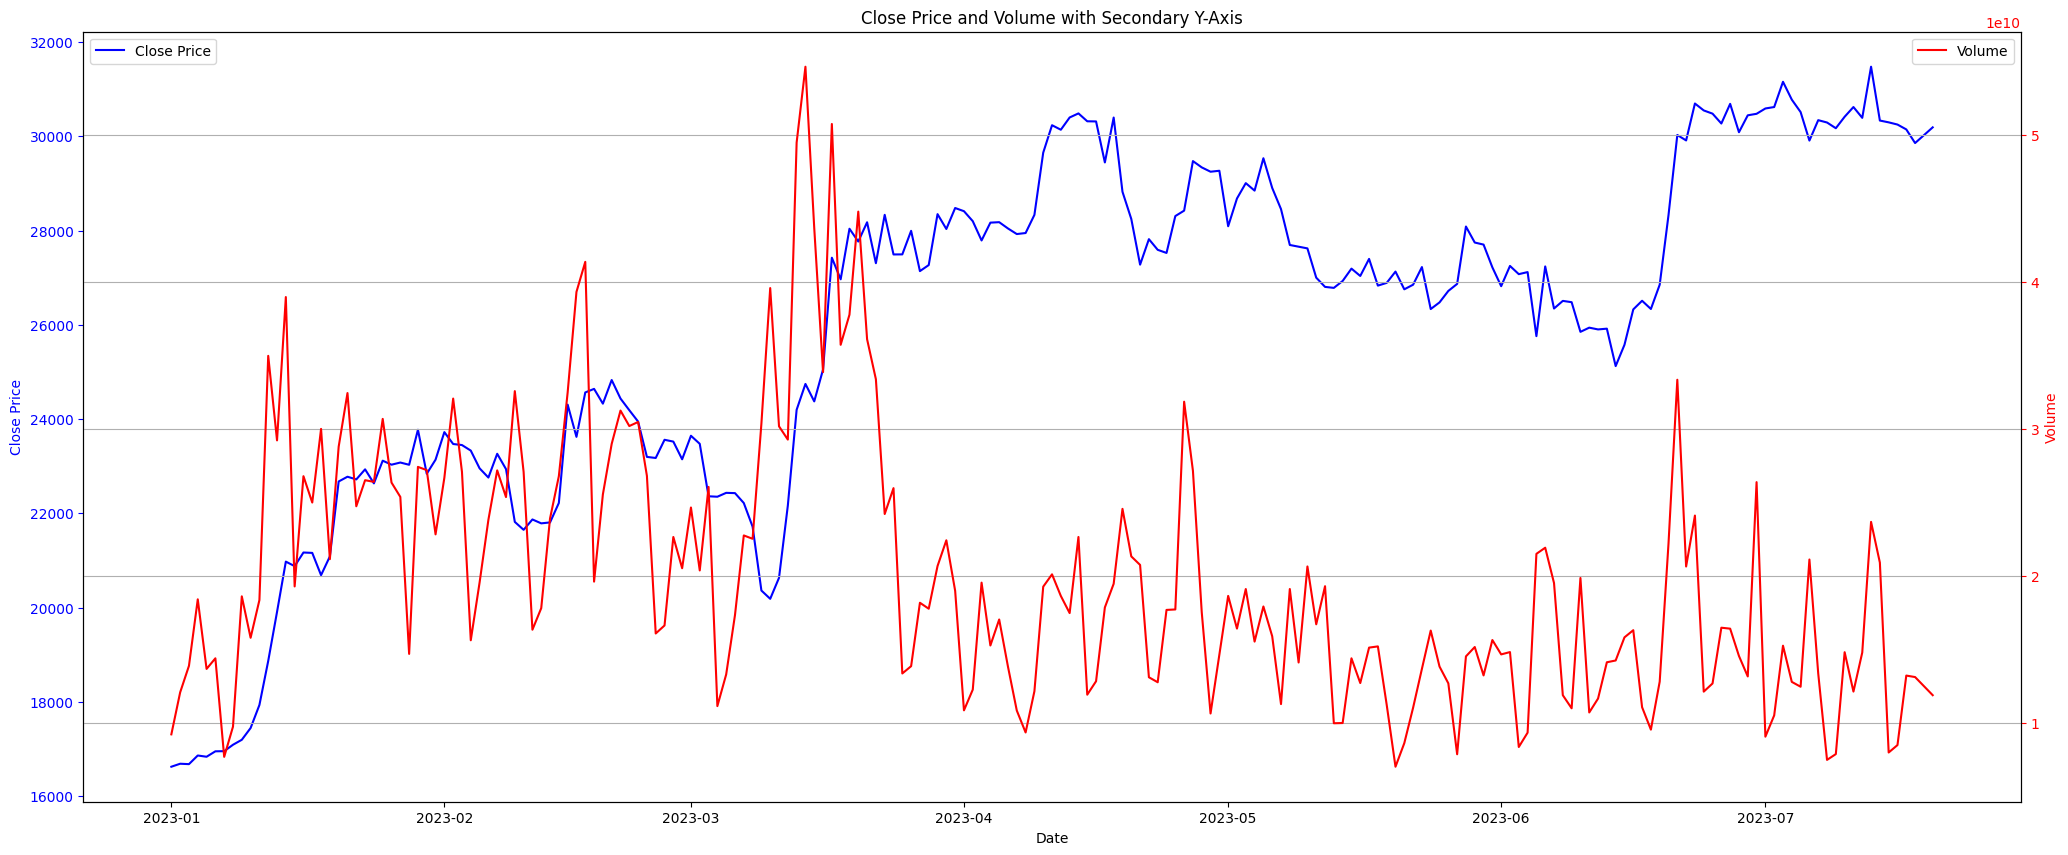

In [48]:
# plot close and volume in a single chart for each year
years = data.index.year.unique()

for year in years:
    fig, ax1 = plt.subplots(figsize=(25,10))
    
    # Plot Close Price on primary y-axis
    sns.lineplot(data=data.loc[str(year)], x=data.loc[str(year)].index, y="Close", ax=ax1, label="Close Price", color="blue")

    # Create secondary y-axis
    ax2 = ax1.twinx()

    # Plot Volume on secondary y-axis
    sns.lineplot(data=data.loc[str(year)], x=data.loc[str(year)].index, y="Volume", ax=ax2, label="Volume", color="red")

    # Customize primary y-axis (Close Price)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Close Price", color="blue")
    ax1.tick_params(axis='y', colors="blue")
    ax1.set_title("Close Price and Volume with Secondary Y-Axis")

    # Customize secondary y-axis (Volume)
    ax2.set_ylabel("Volume", color="red")
    ax2.tick_params(axis='y', colors="red")

    # Add Legends
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Spearman Correlation Matrix:
            Close    Volume
Close   1.000000  0.893982
Volume  0.893982  1.000000


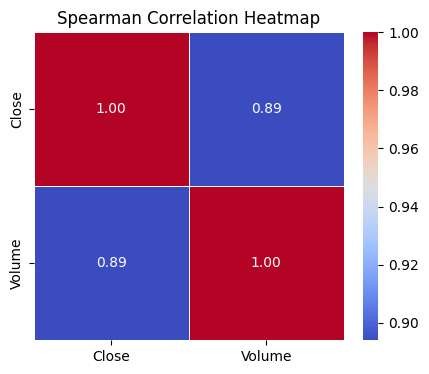

In [49]:
# Compute Spearman correlation
spearman_corr = data[["Close", "Volume"]].corr(method="spearman")

# Display correlation matrix
print("Spearman Correlation Matrix:\n", spearman_corr)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
# lagged variables 
data['Close'].shift(1) # lag is 1 

Date
2014-09-17             NaN
2014-09-18      457.334015
2014-09-19      424.440002
2014-09-20      394.795990
2014-09-21      408.903992
                  ...     
2023-07-15    30334.068359
2023-07-16    30295.806641
2023-07-17    30249.132813
2023-07-18    30145.888672
2023-07-20    29856.562500
Name: Close, Length: 3228, dtype: float64

### Replacing Null Values 

In [50]:
# let me introduce some missing values 
data['30_day_Volume SMA'] = data['Volume'].rolling(window=30).mean()

In [51]:
# let us now find the missing values 
data.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
3_day SMA              2
daily_returns_100%     1
30_day_Volume SMA     29
dtype: int64

In [53]:
# let us get the rows with missing values 
data[data.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume,3_day SMA,daily_returns_100%,30_day_Volume SMA
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,425.523336,-6.984264,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,409.379995,3.573492,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,400.840332,-2.465855,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,403.292338,0.835210,NaN
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,412.254669,8.364742,NaN
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,420.382660,-2.888081,NaN
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,423.523326,-2.748309,NaN


In [54]:
# let us do a backfill to replace the missing values of 30_day_Volume SMA
data['30_day_Volume SMA'] = data['30_day_Volume SMA'].bfill()

# let's view the data now 
data[data.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume,3_day SMA,daily_returns_100%,30_day_Volume SMA
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07


### Problem: Missing Values in Time Series

#### Solution 1: **Forward Fill (ffill)**

➡️ **ffill** means **"fill forward"** — take the last known value and fill it forward until a new value appears.

```python
df['temperature_ffill'] = df['temperature'].ffill()
```

Result:
```
        date  temperature  temperature_ffill
0 2025-04-01         20.0              20.0
1 2025-04-02          NaN              20.0
2 2025-04-03          NaN              20.0
3 2025-04-04         23.0              23.0
4 2025-04-05         24.0              24.0
```

**Usage scenario:**  
- Use when you assume the last value holds until you get a new reading.
- Example: Temperature sensors, stock prices (last known price).

---

#### Solution 2: **Backward Fill (bfill)**

➡️ **bfill** means **"fill backward"** — take the next known value and fill it backward.

```python
df['temperature_bfill'] = df['temperature'].bfill()
```

Result:
```
        date  temperature  temperature_bfill
0 2025-04-01         20.0               20.0
1 2025-04-02          NaN               23.0
2 2025-04-03          NaN               23.0
3 2025-04-04         23.0               23.0
4 2025-04-05         24.0               24.0
```

**Usage scenario:**  
- Use when you assume the next value applies to the missing points.
- Example: Forecasting future prices based on upcoming known values.

---

### Visual Summary:

```
Original:
2025-04-01    20
2025-04-02    NaN
2025-04-03    NaN
2025-04-04    23
2025-04-05    24

ffill:
2025-04-01    20
2025-04-02    20  ← previous value
2025-04-03    20  ← previous value
2025-04-04    23
2025-04-05    24

bfill:
2025-04-01    20
2025-04-02    23  ← next known value
2025-04-03    23  ← next known value
2025-04-04    23
2025-04-05    24
```

---

### In short:
| Method  | Meaning            | Use case |
|---------|-------------------|-----------|
| **ffill** | Forward fill (copy last known value forward) | If past value likely continues |
| **bfill** | Backward fill (copy next known value backward) | If future value expected early |


### 📌 What is Interpolation?

> **Interpolation** means filling in missing values by *estimating* them, based on the surrounding data.

Rather than just dragging values forward (like `ffill`) or backward (like `bfill`), interpolation tries to guess what the value *should* have been by looking at the trend.

---

### 📦 Real-Life Example:

Imagine you’re tracking your **daily water intake**, but you forgot to log it for a few days:

| Day        | Liters Drank |
|------------|--------------|
| Monday     | 2.0          |
| Tuesday    | *missing*    |
| Wednesday  | *missing*    |
| Thursday   | 3.0          |

Now, you know:
- Monday: 2.0 liters
- Thursday: 3.0 liters

If you interpolate, you "guess" the values between them.
Assuming a steady increase, pandas will fill:
- Tuesday: **2.33**
- Wednesday: **2.66**

So it smooths the gaps based on available data.

---

### 🧩 Formula (For Linear Interpolation):

If we use **linear interpolation**, the formula is:

$
\text{Interpolated value} = \text{Previous value} + \frac{\text{Next value} - \text{Previous value}}{\text{Number of steps}} \times \text{Step position}
$

In our case:
- From 2.0 to 3.0, over 3 days.
- Step size: $ \frac{3.0 - 2.0}{3} = 0.33 $

So:
- Tuesday: $2.0 + 0.33 = 2.33 $
- Wednesday: $.33 + 0.33 = 2.66 $

---

### 🔧 In Pandas:

Here’s how you do it:

```python
import pandas as pd

df = pd.DataFrame({
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday'],
    'water': [2.0, None, None, 3.0]
})

df['water_interpolated'] = df['water'].interpolate()

print(df)
```

**Output:**
```
         day  water  water_interpolated
0     Monday    2.0               2.00
1    Tuesday    NaN               2.33
2  Wednesday    NaN               2.66
3   Thursday    3.0               3.00
```

---

### ✅ Why Use Interpolation?

- Smooth out missing values in time series
- Get better estimates for plotting trends
- More natural than `ffill` or `bfill` (which just copy values)

### 🛠️ Types of Interpolation in Pandas:

| Method | Description |
|--------|-------------|
| `linear` (default) | Straight line between points |
| `time` | Time-based interpolation (if index is datetime) |
| `polynomial` | Curve fitting, requires specifying `order=2` or more |
| `spline` | Smooth curve interpolation |
| `nearest` | Use the nearest known value |

---

### 🚀 Rule of Thumb:

- ✅ Use **interpolation** when you want *realistic, smooth* filling of missing values.
- ✅ Use **ffill/bfill** if values logically repeat (like carrying last sensor reading).
- ✅ Use **interpolation** especially for time series like temperature, prices, metrics.

In [55]:
# let us use interpolate 
data['3_day SMA'] = data['3_day SMA'].interpolate(method='linear')
data.head()

,Open,High,Low,Close,Adj Close,Volume,3_day SMA,daily_returns_100%,30_day_Volume SMA
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,425.523336,-6.984264,3.624856e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,409.379995,3.573492,3.624856e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,400.840332,-2.465855,3.624856e+07


### 🧩 Why is interpolate() not working?

Pandas `interpolate()` only works **between** known points.  
In your case, the first few values are `NaN`, and interpolation has nothing before them to work with.

> 📌 **Interpolation requires at least one value before and after the gap.**  
> Since the `NaN` values are at the start, interpolation can’t fill them.

---

In [57]:
# drop the 3_day SMA and instead do a 7_day_Close SMA
data.drop(labels=['3_day SMA'], axis=1, inplace=True)

data['7_day_Close SMA'] = data['Adj Close'].rolling(window=3, 
                                                    min_periods=1).mean()

data.head(10)

,Open,High,Low,Close,Adj Close,Volume,daily_returns_100%,30_day_Volume SMA,7_day_Close SMA
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,3.624856e+07,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-7.192558,3.624856e+07,440.887008
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-6.984264,3.624856e+07,425.523336
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.573492,3.624856e+07,409.379995
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-2.465855,3.624856e+07,400.840332
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,0.835210,3.624856e+07,403.292338
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,8.364742,3.624856e+07,412.254669
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,-2.888081,3.624856e+07,420.382660
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,-2.748309,3.624856e+07,423.523326


See? 🎉

- Without `min_periods`, the first two rows are NaN.
- With `min_periods=1`, pandas starts calculating from the first row!

✅ Here’s the trick:
- When you create a rolling window, you can control how many non-null observations pandas needs to compute the value using min_periods parameter.

By default, `min_periods = window size`.

If you reduce `min_periods`, pandas will start calculating earlier.

### Feature Extraction

In [60]:
# extracting new information from index 
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Day_of_Week'] = data.index.day_of_week

# check whether the day is a weekend or not 
data['is_Weekend'] = np.where(data['Day_of_Week'].isin([5,6]),1,0)

data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns_100%,30_day_Volume SMA,7_day_Close SMA,Year,Month,Day,Day_of_Week,is_Weekend
Date,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,3.624856e+07,457.334015,2014,9,17,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-7.192558,3.624856e+07,440.887008,2014,9,18,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-6.984264,3.624856e+07,425.523336,2014,9,19,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.573492,3.624856e+07,409.379995,2014,9,20,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-2.465855,3.624856e+07,400.840332,2014,9,21,6,1


### Lagged Variables 

### 🚦 What is a Lagged Variable?

In time series, a **lagged variable** is just **a past value of the same variable**.

Think of it like:  
> *"What was this variable doing yesterday? Or two days ago?"*

You "shift" the data backward in time to see how past values might explain or predict current behavior.

---

### 📦 Real-Life Example

Imagine you're tracking your daily **steps**:

| Day        | Steps |
|------------|-------|
| Monday     | 3000  |
| Tuesday    | 4000  |
| Wednesday  | 5000  |
| Thursday   | 7000  |
| Friday     | 8000  |

Now, let’s say you want to add a **lagged variable**: "Steps taken **yesterday**".

So you create a new column: **Lag 1**

| Day        | Steps | Lag 1 (Yesterday's Steps) |
|------------|-------|---------------------------|
| Monday     | 3000  | NaN                       |
| Tuesday    | 4000  | 3000                      |
| Wednesday  | 5000  | 4000                      |
| Thursday   | 7000  | 5000                      |
| Friday     | 8000  | 7000                      |

See?  
- Tuesday's lag is Monday's steps.
- Friday's lag is Thursday's steps.

This is a **lagged variable**!

---

### 🧩 Why use lagged variables?

Because time series depends on **past behavior**.

✅ Example uses:
- Predicting future sales based on past sales.
- Stock price forecasting (what did the price do yesterday?)
- Weather forecasting (temperature 1 day ago, 2 days ago...)

Lagged variables help you:
- Identify trends
- Capture momentum or seasonality
- Build features for predictive models (machine learning!)

---

### 🧑‍💻 How to do it in Pandas:

```python
import pandas as pd

df = pd.DataFrame({
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'steps': [3000, 4000, 5000, 7000, 8000]
})

# Create lagged variable (lag of 1)
df['lag_1'] = df['steps'].shift(1)

print(df)
```

**Output:**
```
         day  steps   lag_1
0     Monday   3000     NaN
1    Tuesday   4000  3000.0
2  Wednesday   5000  4000.0
3   Thursday   7000  5000.0
4     Friday   8000  7000.0
```

---

### ⚠️ Important:
- The first row of the lag column is **NaN** (no previous value).
- If you do `shift(2)`, you get 2 days lagged values.
  
```python
df['lag_2'] = df['steps'].shift(2)
```

---

### 📊 Tip for time series models:
Creating multiple lagged variables (like lag-1, lag-2, lag-3...) is a great way to provide context to models like **ARIMA**, **LSTM**, or simple regressions!

---

### 🧩 Summary

| Term | Meaning |
|------|----------|
| **Lagged Variable** | Value of the same variable from previous time steps |
| **Use** | Understand trends, build predictive models |
| **How to create** | `.shift(n)` in pandas |

---

In [62]:
# create a lagged variable 
data['lag_1 Adj_Close'] = data['Adj Close'].shift(1)
data['lag_2 Adj_Close'] = data['Adj Close'].shift(2)

In [63]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns_100%,30_day_Volume SMA,7_day_Close SMA,Year,Month,Day,Day_of_Week,is_Weekend,lag_1 Adj_Close,lag_2 Adj_Close
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,3.624856e+07,457.334015,2014,9,17,2,0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-7.192558,3.624856e+07,440.887008,2014,9,18,3,0,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-6.984264,3.624856e+07,425.523336,2014,9,19,4,0,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.573492,3.624856e+07,409.379995,2014,9,20,5,1,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-2.465855,3.624856e+07,400.840332,2014,9,21,6,1,408.903992,394.795990


### 🌟 Big Picture: What is Seasonal Decomposition?

In time series data, the values you see are usually a mix of different patterns happening together.

When you do **seasonal decomposition**, you’re basically saying:
> "Let’s break this complicated signal into simpler parts to understand what’s going on."

The typical decomposition splits the time series into 3 (sometimes 4) components:
1. **Trend** — Is it generally going up or down?
2. **Seasonality** — Are there repeating patterns? (daily, weekly, yearly)
3. **Residual (Noise)** — What’s left after removing trend and seasonality.
4. *(Optional: Level — but mainly trend-seasonality-residual are key.)*

---

### 🎯 Real-life Example

Say you’re tracking **ice cream sales** over 3 years:

- **Trend**: Sales are increasing overall, because your business is growing!
- **Seasonality**: Sales spike every summer (hot weather).
- **Residual**: Random things — like a rainy day in summer, or a one-off event.

By decomposing the time series, you’ll see:
- The long-term growth (Trend).
- The predictable yearly summer spikes (Seasonality).
- The unpredictable random noise (Residual).

---

### 🔍 Types of Decomposition

There are two main types:

| Type | Formula | When to use |
|------|---------|-------------|
| **Additive** | Time Series = Trend + Seasonality + Residual | If the changes are consistent (seasonal effect is constant). |
| **Multiplicative** | Time Series = Trend × Seasonality × Residual | If the seasonal effect grows with the trend (like percentage changes). |

✅ **Rule of thumb:**
- If seasonality amplitude stays the same over time, use **additive**.
- If seasonality gets larger as trend increases, use **multiplicative**.

---

### 🧑‍💻 In practice (Python example):

Let’s decompose a time series using `statsmodels`!

```python
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data: monthly airline passengers
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col='Month')

# Decompose the time series
result = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot the decomposition
result.plot()
plt.show()
```

This will give you four plots:
1. **Observed** (the original data)
2. **Trend**
3. **Seasonality**
4. **Residuals**

🎉 Now you can **see** each component visually!

---

### 🔥 Why is this useful?

- **Forecasting**: Easier to predict trend and seasonality separately.
- **Anomaly Detection**: Spikes in the residual component show unusual events.
- **Understanding Patterns**: Helps explain seasonality to stakeholders.

---

### ⚙️ Behind the scenes

Seasonal decomposition typically uses a **moving average** to extract the trend.  
Once trend is found:
- Seasonality is extracted by detrending (remove trend and average by season).
- Residuals are whatever remains after removing trend and seasonality.

---

### 🧩 Summary Table

| Component | Description | Example (Ice Cream Sales) |
|-----------|-------------|--------------------------|
| Trend | Long-term direction | Gradually increasing sales over years |
| Seasonality | Repeating patterns | Summer spikes every year |
| Residual | Noise or irregularities | Random rainy day dip |

---

### ⚡ Final Thought

Seasonal decomposition is like peeling layers of an onion 🍥 —  
You separate the predictable (trend + seasonality) from the unpredictable (residuals).  
This way, you understand your data **better** and build **better models**!

---

### How to identify the Seasonality type - Additive or Multiplicative ?

### 🎯 Step 1: Understand the difference first (quick recap)

| Aspect | Additive | Multiplicative |
|--------|-----------|---------------|
| Formula | Data = Trend + Seasonality + Noise | Data = Trend × Seasonality × Noise |
| Effect of seasonality | Seasonal size stays constant | Seasonal size grows/shrinks with trend |
| Visual clue | Peaks and troughs have the **same size** over time | Peaks and troughs **increase/decrease** as the trend rises/falls |

---

### 🔍 Step 2: Visual Inspection

The easiest first check is **plot your time series**.

#### Additive:
- Pattern stays steady across time.
- Example: Ice cream sales increase by ~50 units every summer.

```
Winter: 100 units
Summer: 150 units
Next year:
Winter: 200 units
Summer: 250 units
```

Here, seasonality difference = 50 units (constant).

---

#### Multiplicative:
- Pattern scales with the level of the series.
- Example: Sales increase **by 20%** every summer, not by a fixed number.

```
Winter: 100 units
Summer: 120 units
Next year:
Winter: 200 units
Summer: 240 units
```

Here, seasonality difference grows:  
Winter to summer jump goes from +20 to +40 units because base level increased!

---

### 🧪 Step 3: Quantitative Check

If visual isn’t clear, try this:

1. **Stabilize variance** using log transformation.
   - If after logging, the seasonal effect looks constant: it was multiplicative.
   
```python
import numpy as np
df['logged'] = np.log(df['value'])
```

2. **Decompose both ways** and compare.
   
```python
from statsmodels.tsa.seasonal import seasonal_decompose

additive = seasonal_decompose(df['value'], model='additive', period=12)
multiplicative = seasonal_decompose(df['value'], model='multiplicative', period=12)

additive.plot()
multiplicative.plot()
plt.show()
```

See which one makes the components cleaner and more sensible!

---

### 🧩 Step 4: Use domain knowledge (this is actually very powerful)

When you know the nature of your data, it helps you decide faster.

| Scenario | Usually Additive? | Usually Multiplicative? |
|----------|------------------|-------------------------|
| Weather data (e.g., temperature) | ✅ Additive (seasonal effect in degrees stays constant) | ❌ |
| Sales data (growing business) | ❌ | ✅ Multiplicative (seasonality grows as business grows) |
| Electricity demand | Depends (stable region = additive, growing region = multiplicative) |
| Stock prices | ❌ | ✅ Multiplicative (percent change matters) |
| Website traffic (fast-growing startup) | ❌ | ✅ Multiplicative |

So, if you're looking at **percent-driven systems**, like sales or web traffic — it's **multiplicative**.

If it’s more natural units, like temperature or units produced daily, and doesn't scale with the trend, it’s **additive**.

---

### 🧠 Summary Cheat Sheet

Here’s a quick memory trick:

> ✅ **If the ups and downs look flat → Additive.**  
> ✅ **If the ups and downs grow or shrink → Multiplicative.**

If unsure, try both decompositions and pick the clearer one!

---

### 🌟 Bonus Tip

If you’re going to forecast, this matters a lot!  
- **Multiplicative seasonality** often means you should use models that support multiplicative effects (like Holt-Winters multiplicative, or SARIMA with log-transformed data).
- Otherwise, forecasts can under or over-estimate seasonality.

---

### ⚡ Quick rule of thumb

| Scenario | Likely Model |
|----------|--------------|
| Fluctuations are constant over time | **Additive** |
| Fluctuations increase/decrease as trend grows/falls | **Multiplicative** |
| Percent change feels more natural than absolute change | **Multiplicative** |

---

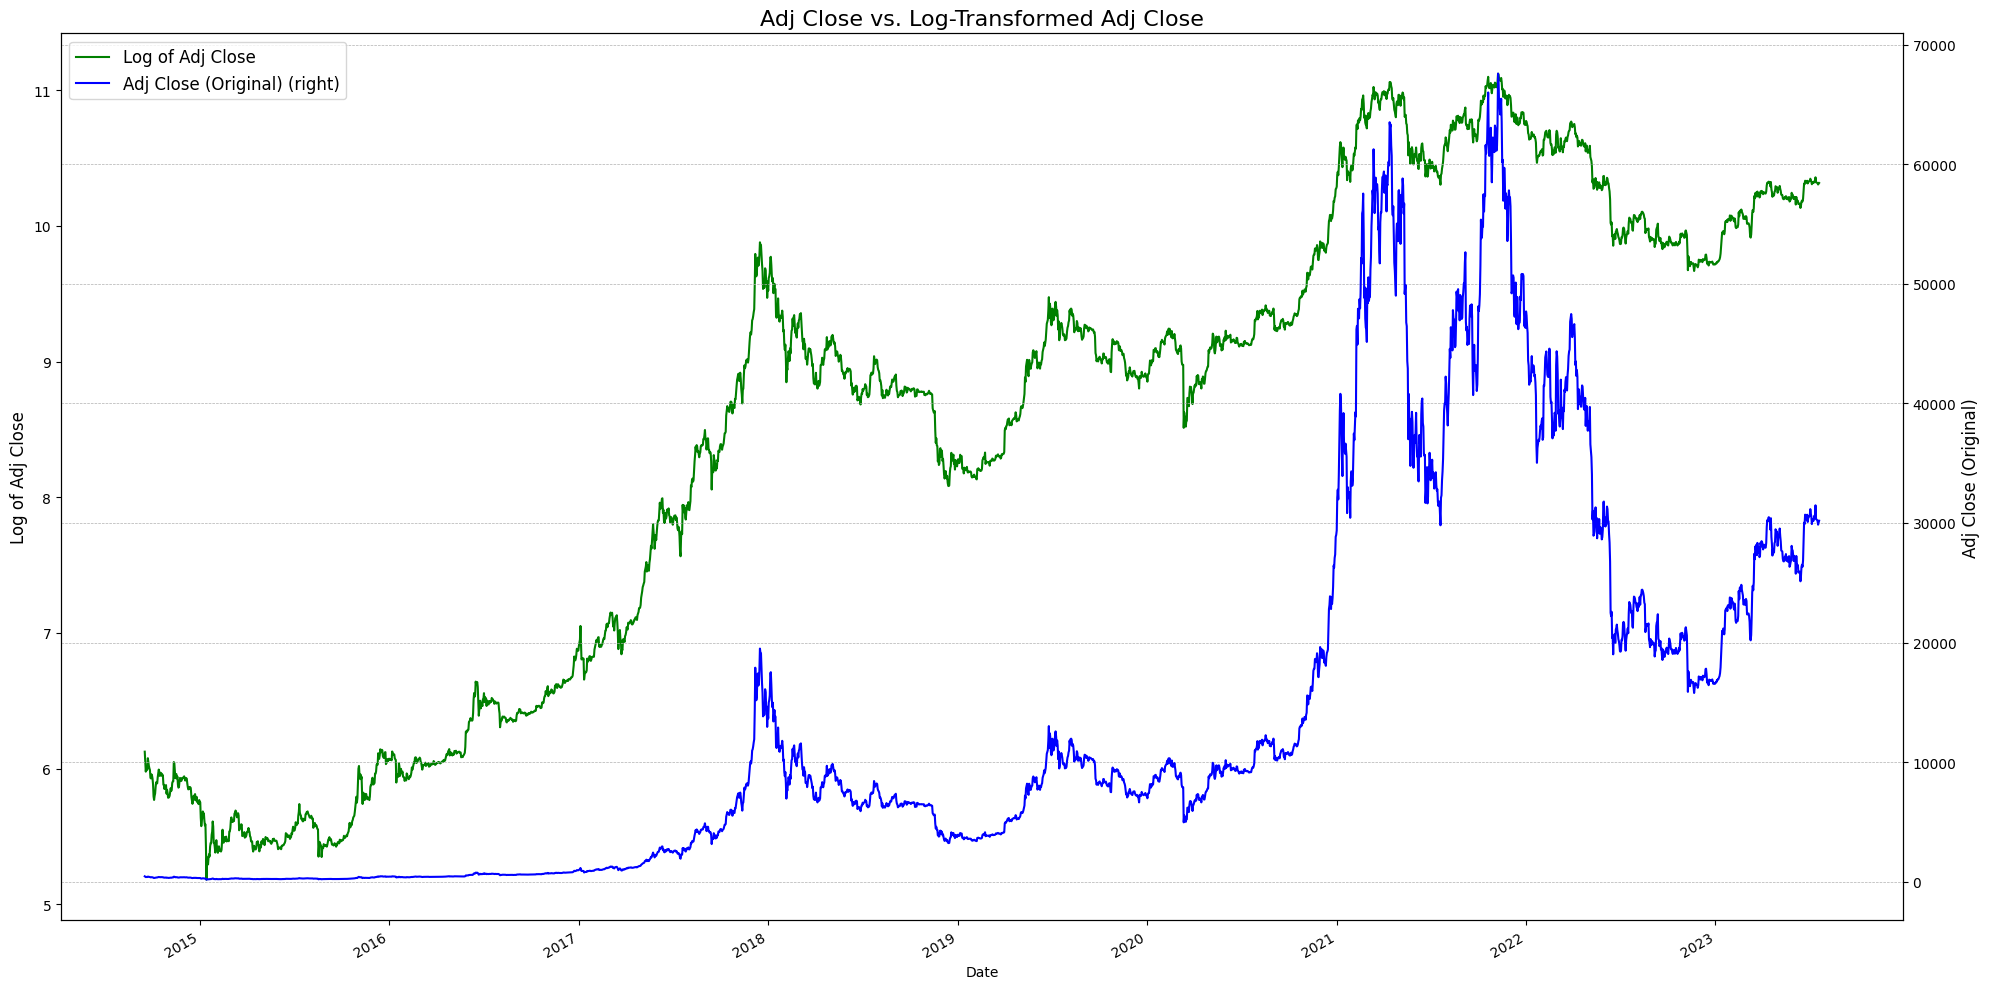

In [70]:
plt.figure(figsize=(20, 10))

# Plot log-transformed data
log_line = np.log(data['Adj Close']).plot(label='Log of Adj Close', color='green')

# Plot original data on secondary y-axis
adj_close_line = data['Adj Close'].plot(secondary_y=True, label='Adj Close (Original)', color='blue')

# Add titles and labels
plt.title('Adj Close vs. Log-Transformed Adj Close', fontsize=16)
log_line.set_ylabel('Log of Adj Close', fontsize=12)
adj_close_line.set_ylabel('Adj Close (Original)', fontsize=12)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Handle legends properly for both axes
lines, labels = log_line.get_legend_handles_labels()
lines2, labels2 = adj_close_line.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

This plot shows:
- Green line: **Log of Adj Close**
- Blue line: **Original Adj Close**, on the secondary axis.

### Observations regarding **seasonality**:
- The log-transformed line helps us see trends and seasonality more clearly because it compresses the scale.
- Looking at both lines:
  - There are clear **cyclical patterns** — especially in the original series, where you see rises and falls that seem to repeat after certain periods.
  - However, the amplitude (height of peaks and depth of troughs) is **not constant**.  
    - The ups and downs get bigger as the overall price grows.  
    - Example: Around 2020–2021, you see huge swings.
  - In the log scale, these swings become visually more stable, suggesting **multiplicative seasonality**.

### Conclusion:
➡️ **This looks like multiplicative seasonality**.  
Because:
- The amplitude of the seasonal effects increases with the level of the series.
- After log-transforming, the seasonality looks much more stable — log-transform often stabilizes multiplicative patterns.

---

### Tip:
To confirm it more rigorously, you can try:
```python
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=365)  # daily data, yearly seasonality
result.plot()
plt.show()
```
If this fits better than `model='additive'`, it's multiplicative!

---